In [3]:
import pandas as pd
import numpy as np
import re
from functools import reduce

import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import folium

In [4]:
dir_path = "/Users/songsooyeoun/Desktop/USElection/"
excel20 = pd.ExcelFile(f"{dir_path}federalelections2020.xlsx")
excel16 = pd.ExcelFile(f"{dir_path}federalelections2016.xlsx")
excel12 = pd.ExcelFile(f"{dir_path}federalelections2012.xlsx")
excel08 = pd.ExcelFile(f"{dir_path}federalelections2008.xlsx")
excel04 = pd.ExcelFile(f"{dir_path}federalelections2004.xlsx")
excel00_88 = pd.ExcelFile(f"{dir_path}federalelections2000.xlsx")

sheet_names20 = excel20.sheet_names
sheet_names16 = excel16.sheet_names
sheet_names12 = excel12.sheet_names
sheet_names08 = excel08.sheet_names
sheet_names04 = excel04.sheet_names
sheet_names00_88 = excel00_88.sheet_names

n_list = [sheet_names20, sheet_names16, sheet_names12, sheet_names08, sheet_names04, sheet_names00_88]
for n in range(len(n_list)):
    print(f'=========== {2020 - n*4} ===========')
    sheet = n_list[n]
    for i in range(len(sheet)):
      print(sheet[i])
    print()

=========== 2020 ===========
1. 2020 Publication Information
2. Table 1 Pres Popular Vote
3. Table 2 Electoral & Pop Vote
4. Table 3 GEVotefor Pres, H, S
5. Table 4 GE VotesCastbyParty
6. Table 5 P&GVotesCastforCong
7. Table 6 Senate by Party
8. Table 7 House by Party
9. 2020 Pres General Results
10. 2020 Pres Primary Results
11.  Pres Primary Party Summary
12. US Senate Results by State
13. US House Results by State
14. 2020 Party Labels
15. 2020 Primary Dates
16. Appendix 1A
17. Appendix 1B
18. Appendix 1C
19. Special Elections 2019-2021

=========== 2016 ===========
Publication Information
Table 1. 2016 Pres Popular Vote
Table 2. Electoral &  Pop Vote
Table 3. GEVotes for Pres, H, S
Table 4. GE Votes Cast by Party
Table 5. P&G VotesCastforCong
Table 6. Senate by Party
Table 7. House by Party
2016 Pres General Results
2016 Pres Primary Results
2016 Pres Primary Party Summary
2016 US Senate Results by State
2016 US House Results by State
2016 Party Labels
2016 Primary Dates
Appendix A

/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/1011831923.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others_votes20 = all_party_votes20.iloc[2:].sum()[1]


,Candidate (Party Label),Popular Vote Total
0,Joseph R. Biden,81283501
1,Donald J. Trump,74223975
2,Others,2922155


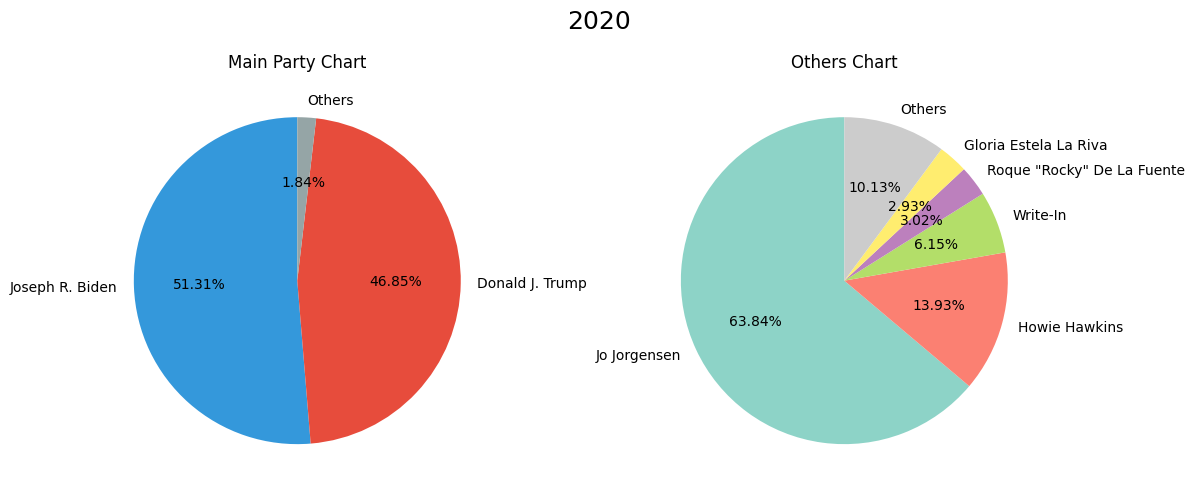

In [5]:
# Pres Popular Vote
PresPopularVote20 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2020.xlsx", sheet_name=sheet_names20[1])
PresPopularVote20.columns = PresPopularVote20.iloc[2]
PresPopularVote20 = PresPopularVote20.iloc[3:41]
PresPopularVote20.reset_index(inplace=True, drop=True)
PresPopularVote20.rename_axis(None, axis=1, inplace=True)

columns = PresPopularVote20.columns
all_party_votes20 = PresPopularVote20.groupby(columns[0])[columns[1]].sum().sort_values(ascending=False).to_frame().reset_index()

# Main Party (Democrat, Republican)
main_party_votes20 = all_party_votes20.iloc[:2].copy()
main_party_votes20[columns[0]] = main_party_votes20[columns[0]].apply(lambda x: x.split('(')[0].strip())
others_votes20 = all_party_votes20.iloc[2:].sum()[1]
main_party_votes20.loc[len(main_party_votes20)] = ['Others', others_votes20]
display(main_party_votes20)

# Others 
others_votes20 = all_party_votes20.iloc[2:]

top_5 = others_votes20.iloc[:5]
rest = pd.DataFrame({
    columns[0]:['Others'],
    columns[1]:[others_votes20.iloc[5:][columns[1]].sum()]
})
plot_data20 = pd.concat([top_5, rest])
plot_data20[columns[0]] = plot_data20[columns[0]].apply(lambda x: x.split('(')[0].strip())

# Main Party chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 5))
plt.suptitle("2020", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(main_party_votes20[columns[1]], labels=main_party_votes20[columns[0]], autopct='%1.2f%%', startangle=90)
plt.title("Main Party Chart")

# Others chart
colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

plt.subplot(1, 2, 2)
plt.pie(plot_data20[columns[1]], labels=plot_data20[columns[0]], autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Others Chart")
plt.tight_layout()

plt.savefig('US Election Result 2020.png')
plt.show()

/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/1375237673.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others_votes16 = all_party_votes16.iloc[2:].sum()[1]


,Candidate (Party Label),Popular Vote Total
0,Hillary Clinton,65853514
1,Donald J. Trump,62984828
2,Others,7830934


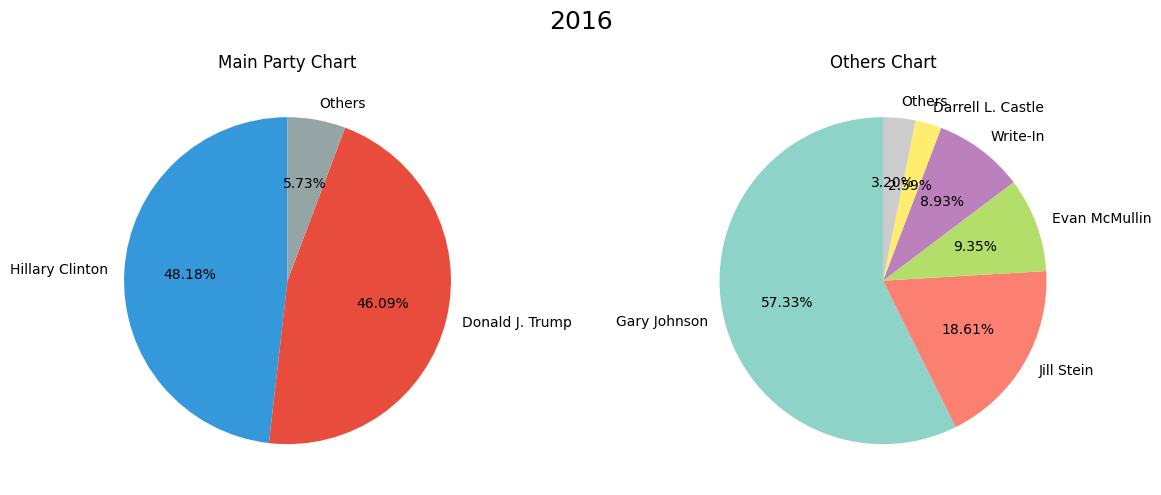

In [6]:
# Pres Popular Vote
PresPopularVote16 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2016.xlsx", sheet_name=sheet_names16[1])
PresPopularVote16.columns = PresPopularVote16.iloc[2]
PresPopularVote16 = PresPopularVote16.iloc[3:36]
PresPopularVote16.reset_index(inplace=True, drop=True)
PresPopularVote16.rename_axis(None, axis=1, inplace=True)

columns = PresPopularVote16.columns
all_party_votes16 = PresPopularVote16.groupby(columns[0])[columns[1]].sum().sort_values(ascending=False).to_frame().reset_index()

# Main Party (Democrat, Republican)
main_party_votes16 = all_party_votes16.iloc[:2].copy()
main_party_votes16[columns[0]] = main_party_votes16[columns[0]].apply(lambda x: x.split('(')[0].strip())
others_votes16 = all_party_votes16.iloc[2:].sum()[1]
main_party_votes16.loc[len(main_party_votes16)] = ['Others', others_votes16]
display(main_party_votes16)

# Others 
others_votes16 = all_party_votes16.iloc[2:]
top_5 = others_votes16.iloc[:5]
rest = pd.DataFrame({
    columns[0]:['Others'],
    columns[1]:[others_votes16.iloc[5:][columns[1]].sum()]
})
plot_data16 = pd.concat([top_5, rest])
# print(plot_data16[columns[0]])
plot_data16[columns[0]] = plot_data16[columns[0]].apply(lambda x: x.split('(')[0].strip())

# Main Party chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 5))
plt.suptitle("2016", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(main_party_votes16[columns[1]], labels=main_party_votes16[columns[0]], autopct='%1.2f%%', startangle=90)
plt.title("Main Party Chart")

# Others chart
colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

plt.subplot(1, 2, 2)
plt.pie(plot_data16[columns[1]], labels=plot_data16[columns[0]], autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Others Chart")
plt.tight_layout()

plt.savefig('US Election Result 2016.png')
plt.show()

/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/610052069.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others_votes12 = all_party_votes12.iloc[2:].sum()[1]


,Candidate (Party Label),Popular Vote Total
0,Barack Obama,65915795
1,Mitt Romney,60933504
2,Others,2236111


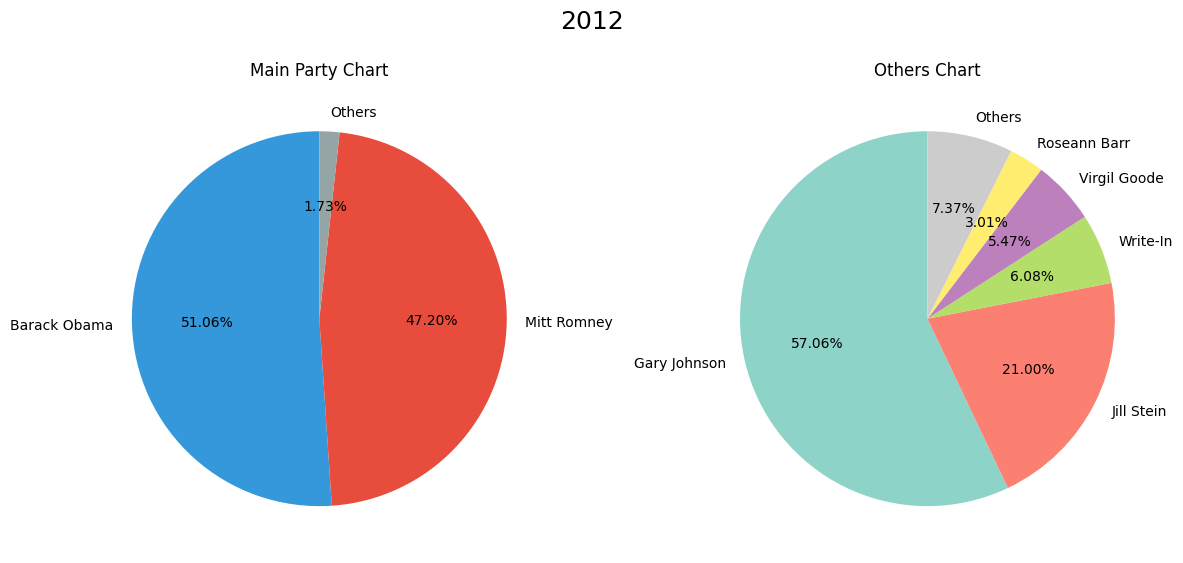

In [7]:
# Pres Popular Vote
PresPopularVote12 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2012.xlsx", sheet_name=sheet_names12[1])
PresPopularVote12.columns = PresPopularVote12.iloc[3]
PresPopularVote12 = PresPopularVote12.iloc[4:34]
PresPopularVote12.reset_index(inplace=True, drop=True)
PresPopularVote12.rename_axis(None, axis=1, inplace=True)

columns = PresPopularVote12.columns
all_party_votes12 = PresPopularVote12.groupby(columns[0])[columns[1]].sum().sort_values(ascending=False).to_frame().reset_index()

# Main Party (Democrat, Republican)
main_party_votes12 = all_party_votes12.iloc[:2].copy()
main_party_votes12[columns[0]] = main_party_votes12[columns[0]].apply(lambda x: x.split('(')[0].strip())
others_votes12 = all_party_votes12.iloc[2:].sum()[1]
main_party_votes12.loc[len(main_party_votes12)] = ['Others', others_votes12]
display(main_party_votes12)

# Others 
others_votes12 = all_party_votes12.iloc[2:]
top_5 = others_votes12.iloc[:5]
rest = pd.DataFrame({
    columns[0]:['Others'],
    columns[1]:[others_votes12.iloc[5:][columns[1]].sum()]
})
plot_data12 = pd.concat([top_5, rest])
# print(plot_data12[columns[0]])
plot_data12[columns[0]] = plot_data12[columns[0]].apply(lambda x: x.split('(')[0].strip())

# Main Party chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 6))
plt.suptitle("2012", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(main_party_votes12[columns[1]], labels=main_party_votes12[columns[0]], autopct='%1.2f%%', startangle=90)
plt.title("Main Party Chart")

# Others chart
colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

plt.subplot(1, 2, 2)
plt.pie(plot_data12[columns[1]], labels=plot_data12[columns[0]], autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Others Chart")
plt.tight_layout()

plt.savefig('US Election Result 2012.png')
plt.show()

/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/2904949800.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others_votes08 = all_party_votes08.iloc[2:].sum()[1]


,Candidate (Party Label),Popular Vote Total
0,Barack Obama,69498516
1,John McCain,59948323
2,Others,1866981


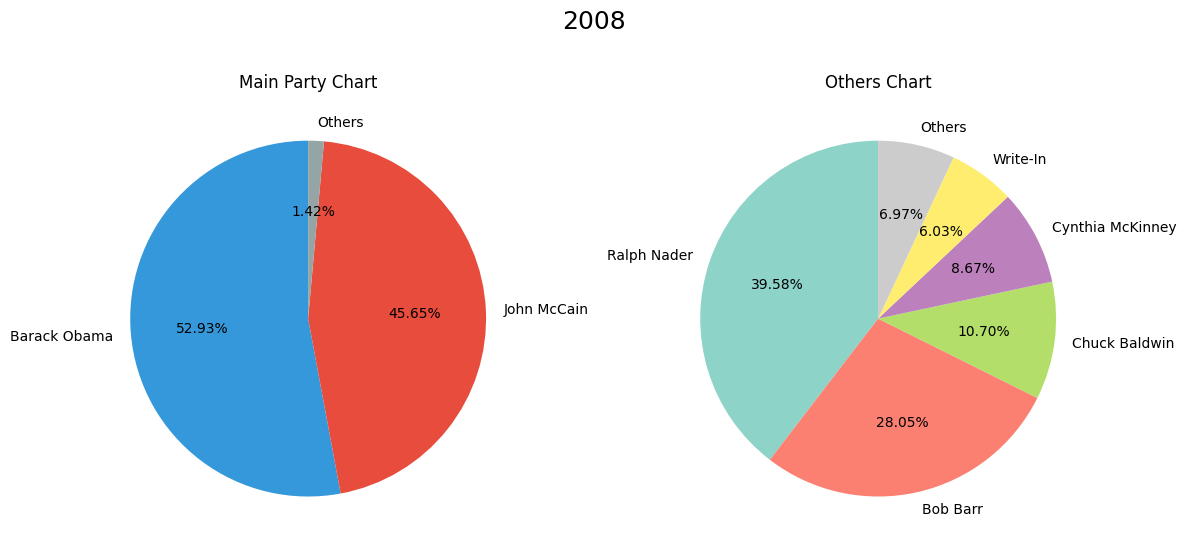

In [8]:
# Pres Popular Vote
PresPopularVote08 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2008.xlsx", sheet_name=sheet_names08[1])
PresPopularVote08.columns = PresPopularVote08.iloc[2]
PresPopularVote08 = PresPopularVote08.iloc[3:29]
PresPopularVote08.reset_index(inplace=True, drop=True)
PresPopularVote08.rename_axis(None, axis=1, inplace=True)

columns = PresPopularVote08.columns
all_party_votes08 = PresPopularVote08.iloc[:29].groupby(columns[0])[columns[1]].sum().sort_values(ascending=False).to_frame().reset_index()

# Main Party (Democrat, Republican)
main_party_votes08 = all_party_votes08.iloc[:2].copy()
main_party_votes08[columns[0]] = main_party_votes08[columns[0]].apply(lambda x: x.split('(')[0].strip())
others_votes08 = all_party_votes08.iloc[2:].sum()[1]
main_party_votes08.loc[len(main_party_votes08)] = ['Others', others_votes08]
display(main_party_votes08)

# Others 
others_votes08 = all_party_votes08.iloc[2:]
top_5 = others_votes08.iloc[:5]
rest = pd.DataFrame({
    columns[0]:['Others'],
    columns[1]:[others_votes08.iloc[5:][columns[1]].sum()]
})
plot_data08 = pd.concat([top_5, rest])
# print(plot_data08[columns[0]])
plot_data08[columns[0]] = plot_data08[columns[0]].apply(lambda x: x.split('(')[0].strip())

# Main Party chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 6))
plt.suptitle("2008", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(main_party_votes08[columns[1]], labels=main_party_votes08[columns[0]], autopct='%1.2f%%', startangle=90)
plt.title("Main Party Chart")

# Others chart
colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

plt.subplot(1, 2, 2)
plt.pie(plot_data08[columns[1]], labels=plot_data08[columns[0]], autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Others Chart")
plt.tight_layout()

plt.savefig('US Election Result 2008.png')
plt.show()

/usr/local/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/2131091919.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others_votes04 = all_party_votes04.iloc[2:].sum()[1]


,Candidate (Party Label),Popular Vote Total
0,George W. Bush,62040610
1,John F. Kerry,59028444
2,Others,1226291


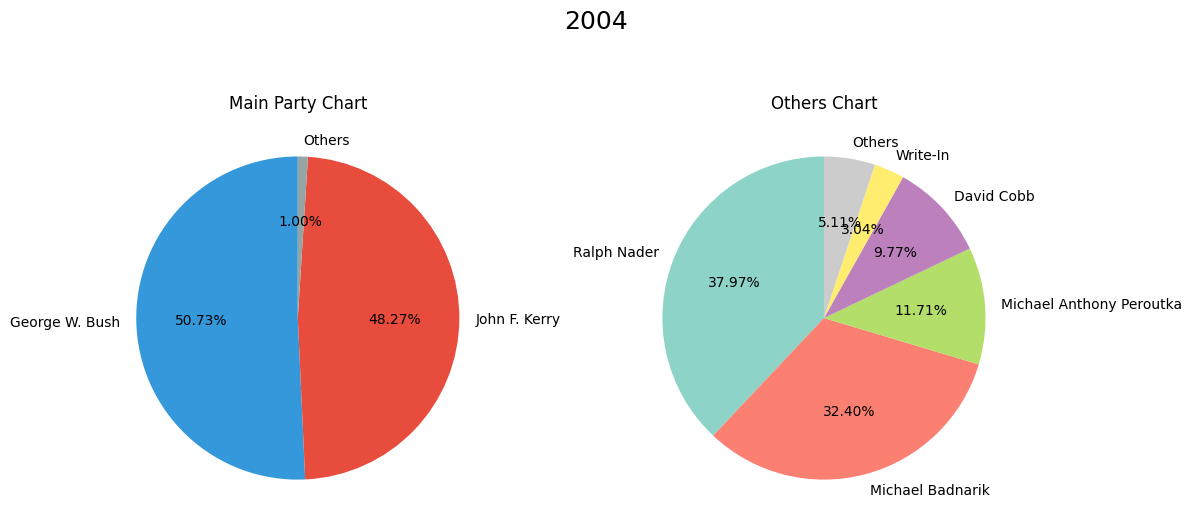

In [9]:
# Pres Popular Vote
PresPopularVote04 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2004.xlsx", sheet_name=sheet_names04[1])
PresPopularVote04.columns = PresPopularVote04.iloc[2]
PresPopularVote04['Candidate'] = PresPopularVote04.apply(
                                        lambda row: f"{row['Candidate']} ({row['(Party Label)']})" if pd.notna(row['(Party Label)']) else row['Candidate'], axis=1)
PresPopularVote04.rename(columns={'Candidate':'Candidate (Party Label)'}, inplace=True)
PresPopularVote04.drop(columns='(Party Label)', inplace=True)
PresPopularVote04 = PresPopularVote04.iloc[3:22]
PresPopularVote04.reset_index(inplace=True, drop=True)
PresPopularVote04.rename_axis(None, axis=1, inplace=True)

columns = PresPopularVote04.columns
all_party_votes04 = PresPopularVote04.groupby(columns[0])[columns[1]].sum().sort_values(ascending=False).to_frame().reset_index()

# Main Party (Democrat, Republican)
main_party_votes04 = all_party_votes04.iloc[:2].copy()
main_party_votes04[columns[0]] = main_party_votes04[columns[0]].apply(lambda x: x.split('(')[0].strip())
others_votes04 = all_party_votes04.iloc[2:].sum()[1]
main_party_votes04.loc[len(main_party_votes04)] = ['Others', others_votes04]
display(main_party_votes04)

# Others 
others_votes04 = all_party_votes04.iloc[2:]
top_5 = others_votes04.iloc[:5]
rest = pd.DataFrame({
    columns[0]:['Others'],
    columns[1]:[others_votes04.iloc[5:][columns[1]].sum()]
})
plot_data04 = pd.concat([top_5, rest])
# print(plot_data04[columns[0]])
plot_data04[columns[0]] = plot_data04[columns[0]].apply(lambda x: x.split('(')[0].strip())

# Main Party chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 6))
plt.suptitle("2004", fontsize=18)

plt.subplot(1, 2, 1)
plt.pie(main_party_votes04[columns[1]], labels=main_party_votes04[columns[0]], autopct='%1.2f%%', startangle=90)
plt.title("Main Party Chart")

# Others chart
colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

plt.subplot(1, 2, 2)
plt.pie(plot_data04[columns[1]], labels=plot_data04[columns[0]], autopct='%1.2f%%', colors=colors, startangle=90)
plt.title("Others Chart")
plt.tight_layout()

plt.savefig('US Election Result 2004.png')
plt.show()

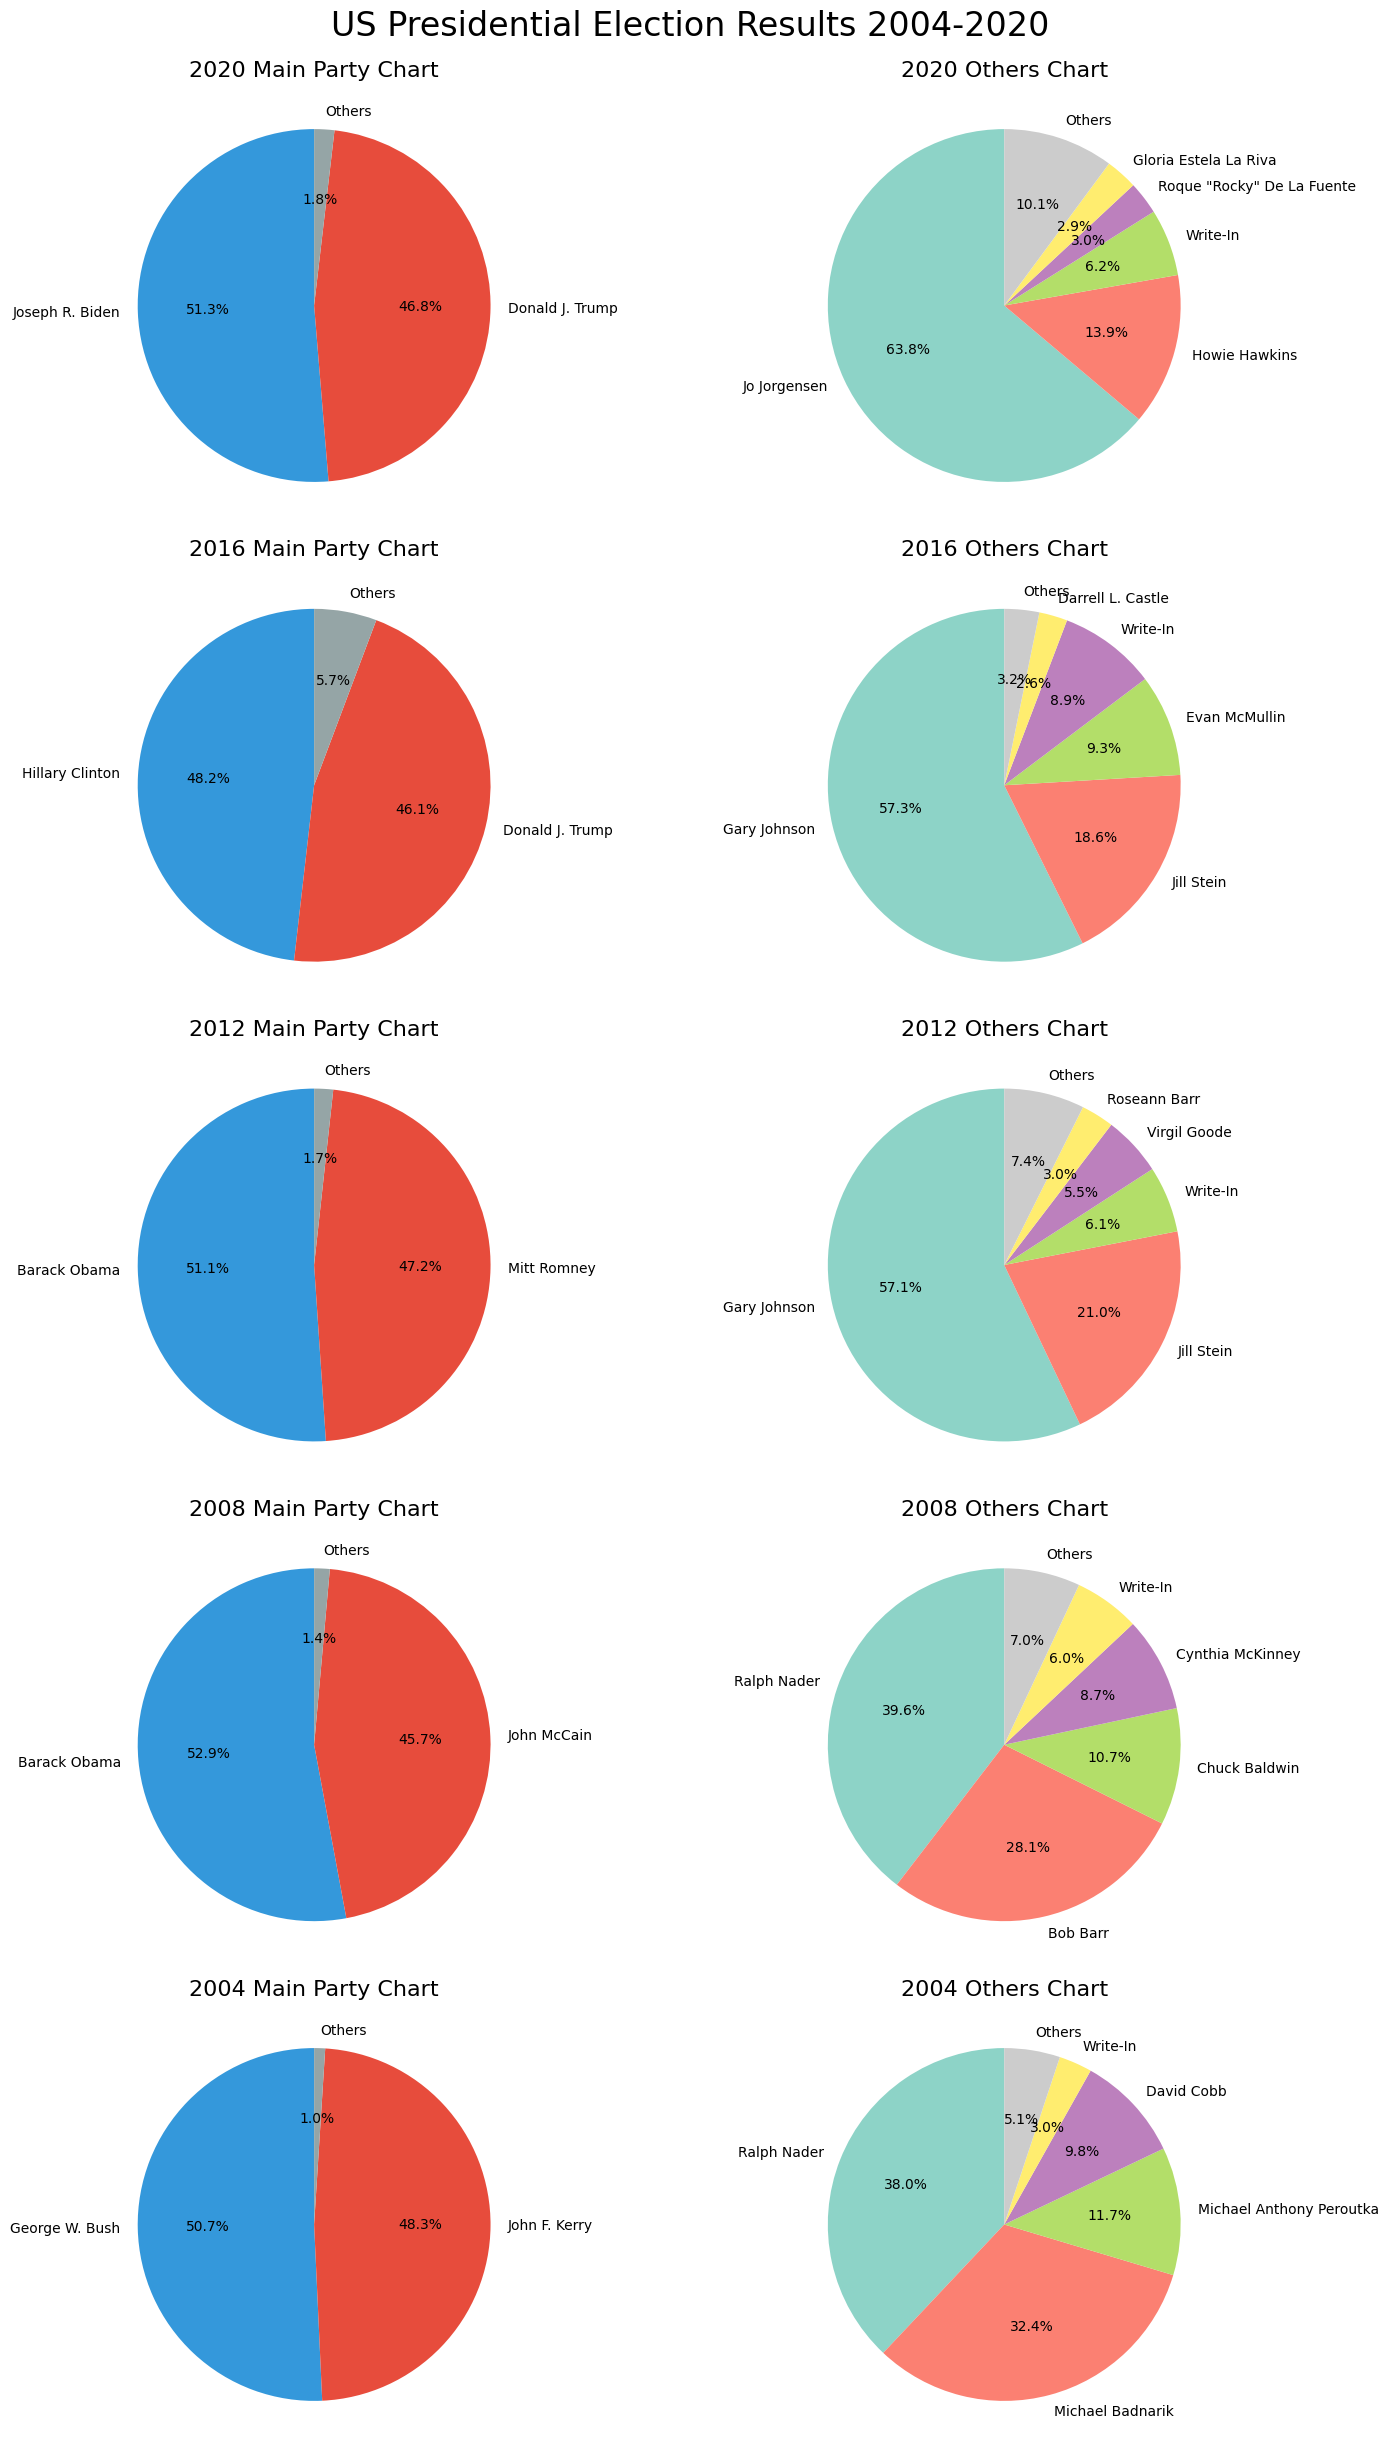

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure
plt.figure(figsize=(15, 25))
plt.suptitle("US Presidential Election Results 2004-2020", fontsize=24)

# Define colors
main_colors = ['#3498db', '#e74c3c', '#95a5a6']
other_colors = plt.cm.Set3(np.linspace(0, 1, 5)).tolist() + ['#CCCCCC']

# Function to create pie charts
def create_pie_charts(year, main_data, other_data, row):
    # Main Party chart
    plt.subplot(5, 2, 2*row-1)
    plt.pie(main_data[columns[1]], labels=main_data[columns[0]], autopct='%1.1f%%', startangle=90, colors=main_colors)
    plt.title(f"{year} Main Party Chart", fontsize=16)
    
    # Others chart
    plt.subplot(5, 2, 2*row)
    plt.pie(other_data[columns[1]], labels=other_data[columns[0]], autopct='%1.1f%%', startangle=90, colors=other_colors)
    plt.title(f"{year} Others Chart", fontsize=16)

# Create charts for each year
create_pie_charts(2020, main_party_votes20, plot_data20, 1)
create_pie_charts(2016, main_party_votes16, plot_data16, 2)
create_pie_charts(2012, main_party_votes12, plot_data12, 3)
create_pie_charts(2008, main_party_votes08, plot_data08, 4)
create_pie_charts(2004, main_party_votes04, plot_data04, 5)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('US_Election_Results_2004-2020.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Electoral and Popular Vote | GAP: D(+) R(-)
ElectoralPopVote20 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2020.xlsx", sheet_name=sheet_names20[2])
ElectoralPopVote20.iloc[2] = ElectoralPopVote20.iloc[1] + '/ ' + ElectoralPopVote20.iloc[2]
ElectoralPopVote20.iloc[2,0] = 'STATE'
ElectoralPopVote20.columns = ElectoralPopVote20.iloc[2]
columns = ElectoralPopVote20.columns
ElectoralPopVote20 = ElectoralPopVote20.iloc[3:55]
ElectoralPopVote20.rename_axis(None, axis=1, inplace=True)
ElectoralPopVote20.reset_index(inplace=True, drop=True)
ElectoralPopVote20.fillna(0, inplace=True)
ElectoralPopVote20['GAP'] = ElectoralPopVote20[columns[3]] - ElectoralPopVote20[columns[4]]
ElectoralPopVote20['GAP_pt'] = ElectoralPopVote20['GAP']/ElectoralPopVote20['POPULAR VOTE/ Total Vote']
ElectoralPopVote20['Turnout'] = (ElectoralPopVote20[ElectoralPopVote20.columns[1]] + ElectoralPopVote20[ElectoralPopVote20.columns[2]]) /  ElectoralPopVote20['POPULAR VOTE/ Total Vote']

# Who won?
ElectoralPopVote20['WON_PARTY'] = 0
for i in range(len(ElectoralPopVote20)):
    if ElectoralPopVote20.iloc[i, 1] != 0:
        ElectoralPopVote20.iloc[i, -1] = 'D'
    else:
        ElectoralPopVote20.iloc[i, -1] = 'R'

# ---------------------------------------------
ElectoralPopVote16 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2016.xlsx", sheet_name=sheet_names16[2])
ElectoralPopVote16.iloc[2] = ElectoralPopVote16.iloc[1] + '/ ' + ElectoralPopVote16.iloc[2]
ElectoralPopVote16.iloc[2,0] = 'STATE'
ElectoralPopVote16.columns = ElectoralPopVote16.iloc[2]
columns = ElectoralPopVote16.columns
ElectoralPopVote16 = ElectoralPopVote16.iloc[3:55]
ElectoralPopVote16.rename_axis(None, axis=1, inplace=True)
ElectoralPopVote16.reset_index(inplace=True, drop=True)
ElectoralPopVote16.fillna(0, inplace=True)

'''
*   Texas has 38 Electoral Votes.  1 was cast for John Kasich and 1 was cast for Ron Paul. 
**  Hawaii has 4 Electoral Votes and 1 was cast for Bernie Sanders.  
**  Washington has 12 Electoral Votes.  3 were cast for Colin Powell and 1 was cast for Faith Spotted Eagle.
'''
 
ElectoralPopVote16.iloc[11,2] = 3   # HI
ElectoralPopVote16.iloc[43,1] = 36  # TX
ElectoralPopVote16.iloc[47,2] = 8   # WA
ElectoralPopVote16.iloc[-1,1] = 304 # TOTAL
ElectoralPopVote16.iloc[-1,2] = 227 # TOTAL
ElectoralPopVote16['GAP'] = ElectoralPopVote16[columns[4]] - ElectoralPopVote16[columns[3]]
ElectoralPopVote16['GAP_pt'] = ElectoralPopVote16['GAP']/ElectoralPopVote16['POPULAR VOTE/ Total Vote']
ElectoralPopVote16['Turnout'] = (ElectoralPopVote16[ElectoralPopVote16.columns[1]] + ElectoralPopVote16[ElectoralPopVote16.columns[2]]) /  ElectoralPopVote16['POPULAR VOTE/ Total Vote']

# Who won?
ElectoralPopVote16['WON_PARTY'] = 0
for i in range(len(ElectoralPopVote16)):
    if ElectoralPopVote16.iloc[i, 1] != 0:
        ElectoralPopVote16.iloc[i, -1] = 'R'
    else:
        ElectoralPopVote16.iloc[i, -1] = 'D'

# ---------------------------------------------
ElectoralPopVote12 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2012.xlsx", sheet_name=sheet_names12[2])
columns = ['STATE', 'ELECTORAL VOTE/ Obama (D)', 'ELECTORAL VOTE/ Romney (R)', 'POPULAR VOTE/ Obama (D)', 'POPULAR VOTE/ Romney (R)', 'POPULAR VOTE/ All Others', 'POPULAR VOTE/ Total Vote']
ElectoralPopVote12.columns = columns
ElectoralPopVote12 = ElectoralPopVote12.iloc[4:56]
ElectoralPopVote12.rename_axis(None, axis=1, inplace=True)
ElectoralPopVote12.reset_index(inplace=True, drop=True)
ElectoralPopVote12.fillna(0, inplace=True)
ElectoralPopVote12['GAP'] = ElectoralPopVote12[columns[3]] - ElectoralPopVote12[columns[4]]
ElectoralPopVote12['GAP_pt'] = ElectoralPopVote12['GAP']/ElectoralPopVote12['POPULAR VOTE/ Total Vote']
ElectoralPopVote12['Turnout'] = (ElectoralPopVote12[ElectoralPopVote12.columns[1]] + ElectoralPopVote12[ElectoralPopVote12.columns[2]]) /  ElectoralPopVote12['POPULAR VOTE/ Total Vote']

# Who won?
ElectoralPopVote12['WON_PARTY'] = 0
for i in range(len(ElectoralPopVote12)):
    if ElectoralPopVote12.iloc[i, 1] != 0:
        ElectoralPopVote12.iloc[i, -1] = 'D'
    else:
        ElectoralPopVote12.iloc[i, -1] = 'R'

# ---------------------------------------------
ElectoralPopVote08 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2008.xlsx", sheet_name=sheet_names08[2])
columns = ['STATE', 'ELECTORAL VOTE/ Obama (D)', 'ELECTORAL VOTE/ McCain (R)', 'POPULAR VOTE/ Obama (D)', 'POPULAR VOTE/ McCain (R)', 'POPULAR VOTE/ All Others', 'POPULAR VOTE/ Total Vote']
ElectoralPopVote08.columns = columns
ElectoralPopVote08 = ElectoralPopVote08.iloc[3:55]
ElectoralPopVote08.rename_axis(None, axis=1, inplace=True)
ElectoralPopVote08.reset_index(inplace=True, drop=True)
ElectoralPopVote08.fillna(0, inplace=True)
ElectoralPopVote08['GAP'] = ElectoralPopVote08[columns[3]] - ElectoralPopVote08[columns[4]]
ElectoralPopVote08['GAP_pt'] = ElectoralPopVote08['GAP']/ElectoralPopVote08['POPULAR VOTE/ Total Vote']
ElectoralPopVote08['Turnout'] = (ElectoralPopVote08[ElectoralPopVote08.columns[1]] + ElectoralPopVote08[ElectoralPopVote08.columns[2]]) /  ElectoralPopVote08['POPULAR VOTE/ Total Vote']

# Who won?
ElectoralPopVote08['WON_PARTY'] = 0
for i in range(len(ElectoralPopVote08)):
    if ElectoralPopVote08.iloc[i, 1] != 0:
        ElectoralPopVote08.iloc[i, -1] = 'D'
    else:
        ElectoralPopVote08.iloc[i, -1] = 'R'

# ---------------------------------------------
ElectoralPopVote04 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2004.xlsx", sheet_name=sheet_names04[2])
# isinstance(object, type) - 객체가 지정한 클래스 또는 타입 판별
# ElectoralPopVote04.iloc[1] = ElectoralPopVote04.iloc[1].apply(lambda x: x.replace('Vote', 'Vote/ ') if isinstance(x, str) else x)
columns = ['STATE', 'ELECTORAL VOTE/ Bush (R)', 'ELECTORAL VOTE/ Kerry (D)', 'POPULAR VOTE/ Bush (R)', 'POPULAR VOTE/ Kerry (D)', 'POPULAR VOTE/ All Others', 'POPULAR VOTE/ Total Vote']
ElectoralPopVote04.columns = columns
ElectoralPopVote04 = ElectoralPopVote04.iloc[2:54]
ElectoralPopVote04.rename_axis(None, axis=1, inplace=True)
ElectoralPopVote04.reset_index(inplace=True, drop=True)
ElectoralPopVote04.fillna(0, inplace=True)
ElectoralPopVote04['GAP'] = ElectoralPopVote04[columns[4]] - ElectoralPopVote04[columns[3]]
ElectoralPopVote04['GAP_pt'] = ElectoralPopVote04['GAP']/ElectoralPopVote04['POPULAR VOTE/ Total Vote']

ElectoralPopVote04.iloc[23, 2] = 9 # MN
ElectoralPopVote04.iloc[-1, 2] = 251 # Total

ElectoralPopVote04['Turnout'] = (ElectoralPopVote04[ElectoralPopVote04.columns[1]] + ElectoralPopVote04[ElectoralPopVote04.columns[2]]) /  ElectoralPopVote04['POPULAR VOTE/ Total Vote']

# Who won?
ElectoralPopVote04['WON_PARTY'] = 0
for i in range(len(ElectoralPopVote04)):
    if ElectoralPopVote04.iloc[i, 1] != 0:
        ElectoralPopVote04.iloc[i, -1] = 'R'
    else:
        ElectoralPopVote04.iloc[i, -1] = 'D'

/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/2809555999.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ElectoralPopVote20.fillna(0, inplace=True)
/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/2809555999.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'R' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ElectoralPopVote20.iloc[i, -1] = 'R'
/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/2809555999.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to

,20_CAND,20_TOTAL/ POP VOTE,20_TOTAL/ ELEC VOTE,16_CAND,16_TOTAL/ POP VOTE,16_TOTAL/ ELEC VOTE,12_CAND,12_TOTAL/ POP VOTE,12_TOTAL/ ELEC VOTE,08_CAND,08_TOTAL/ POP VOTE,08_TOTAL/ ELEC VOTE,04_CAND,04_TOTAL/ POP VOTE,04_TOTAL/ ELEC VOTE
0,Joseph R. Biden,81283501,306,Hillary Clinton,65853514,227,Barack Obama,65915795,332,Barack Obama,69498516,365,George W. Bush,62040610,251
1,Donald J. Trump,74223975,232,Donald J. Trump,62984828,304,Mitt Romney,60933504,206,John McCain,59948323,173,John F. Kerry,59028444,286
2,Others,2922155,0,Others,7830934,0,Others,2236111,0,Others,1866981,0,Others,1226291,0


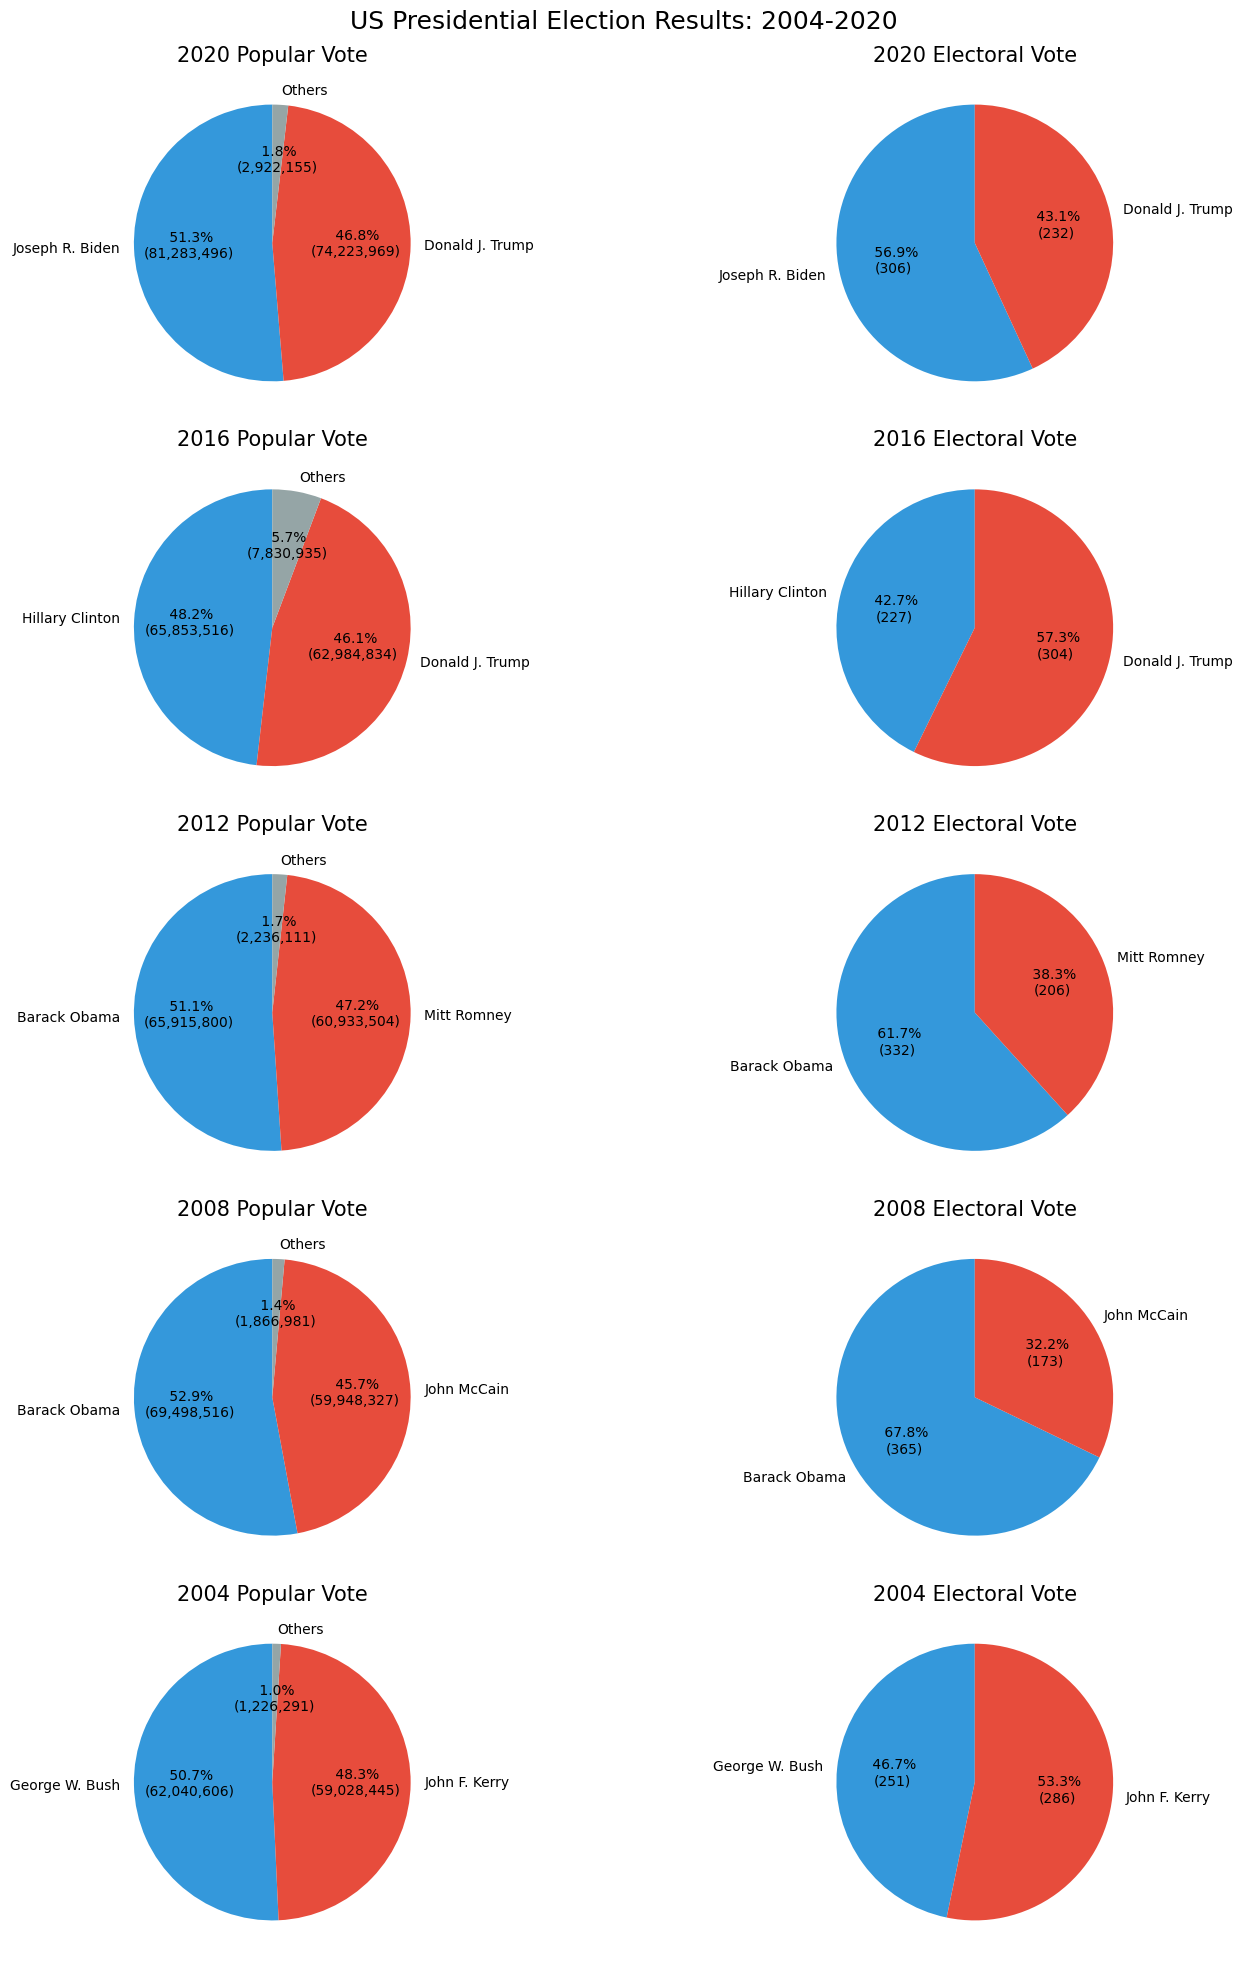

In [12]:
main_party_votes = pd.DataFrame() 

main_party_votes['20_CAND'] = main_party_votes20['Candidate (Party Label)']
main_party_votes['20_TOTAL/ POP VOTE'] = main_party_votes20['Popular Vote Total']
main_party_votes['20_TOTAL/ ELEC VOTE'] = 0
main_party_votes.iloc[0,2] = ElectoralPopVote20.iloc[-1, 1]
main_party_votes.iloc[1,2] = ElectoralPopVote20.iloc[-1, 2]

main_party_votes['16_CAND'] = main_party_votes16['Candidate (Party Label)']
main_party_votes['16_TOTAL/ POP VOTE'] = main_party_votes16['Popular Vote Total']
main_party_votes['16_TOTAL/ ELEC VOTE'] = 0
main_party_votes.iloc[1, 5] = ElectoralPopVote16.iloc[-1, 1]
main_party_votes.iloc[0, 5] = ElectoralPopVote16.iloc[-1, 2]

main_party_votes['12_CAND'] = main_party_votes12['Candidate (Party Label)']
main_party_votes['12_TOTAL/ POP VOTE'] = main_party_votes12['Popular Vote Total']
main_party_votes['12_TOTAL/ ELEC VOTE'] = 0
main_party_votes.iloc[0,8] = ElectoralPopVote12.iloc[-1, 1]
main_party_votes.iloc[1,8] = ElectoralPopVote12.iloc[-1, 2]


main_party_votes['08_CAND'] = main_party_votes08['Candidate (Party Label)']
main_party_votes['08_TOTAL/ POP VOTE'] = main_party_votes08['Popular Vote Total']
main_party_votes['08_TOTAL/ ELEC VOTE'] = 0
main_party_votes.iloc[0,11] = ElectoralPopVote08.iloc[-1, 1]
main_party_votes.iloc[1,11] = ElectoralPopVote08.iloc[-1, 2]

main_party_votes['04_CAND'] = main_party_votes04['Candidate (Party Label)'][::-1]
main_party_votes['04_TOTAL/ POP VOTE'] = main_party_votes04['Popular Vote Total'][::-1]
main_party_votes['04_TOTAL/ ELEC VOTE'] = 0
main_party_votes.iloc[1,-1] = ElectoralPopVote04.iloc[-1, 1]
main_party_votes.iloc[0,-1] = ElectoralPopVote04.iloc[-1, 2]

display(main_party_votes)
columns = main_party_votes.columns

# Plot
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p: .1f}%\n({v:,d})'.format(p=pct, v=val)
    return my_autopct
    
colors = ['#3498db', '#e74c3c', '#95a5a6']
sns.set_palette(sns.color_palette(colors))

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('US Presidential Election Results: 2004-2020', fontsize=18)

# year   = [2020, 2016, 2012, 2008, 2004]
# labels = [0, 3, 6, 9, 12]
# pop    = [1, 4, 7, 10, 13]
# elec   = [2, 5, 8, 11, 14]

def make_plot(row, col, n):
    axs[row,col].pie(main_party_votes[columns[3*n + 1]], labels=main_party_votes[columns[3*n]], autopct=make_autopct(main_party_votes[columns[3*n + 1]]), startangle=90)
    axs[row,col].set_title(f'{2020 - n*4} Popular Vote', fontsize=15)
    axs[row,col+1].pie(main_party_votes[columns[3*n + 2]][:2], labels=main_party_votes[columns[3*n]][:2], autopct=make_autopct(main_party_votes[columns[3*n + 2]]), startangle=90)
    axs[row,col+1].set_title(f'{2020 - n*4} Electoral Vote', fontsize=15)

row, col,n = 0, 0, 0
for i in range(5):
    make_plot(row, col, n)
    row += 1
    n += 1

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('US Presidential Election Results: 2004-2020.png')
plt.show()

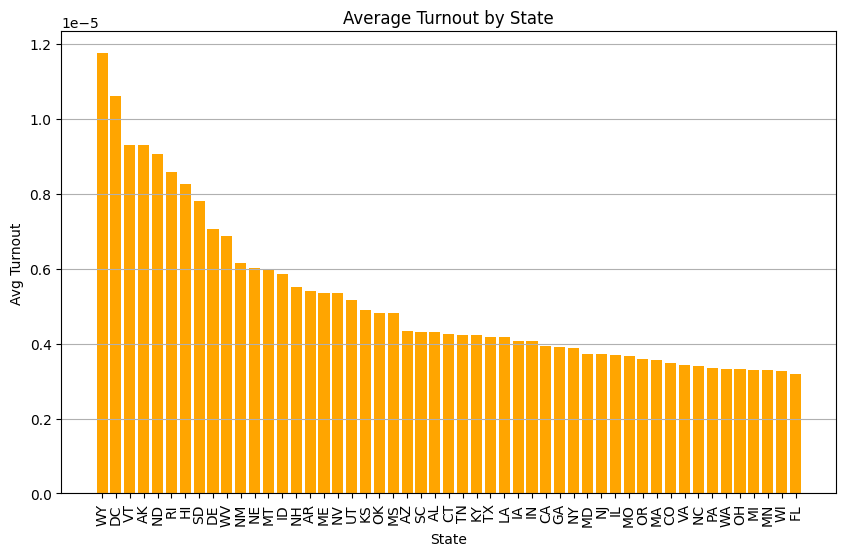

In [13]:
col = 'Turnout'
totalvote = ElectoralPopVote04[col] + ElectoralPopVote08[col] + ElectoralPopVote12[col] +  \
            ElectoralPopVote16[col] + ElectoralPopVote20[col]
totalvote /= 5
totalvote = totalvote[:-1]
states = ElectoralPopVote16.iloc[:-1, 0]

sorted_idx = np.argsort(totalvote)[::-1]
states = states[sorted_idx]
totalvote = totalvote[sorted_idx]

plt.figure(figsize=(10,6))
plt.bar(states, totalvote, color='orange')
plt.xlabel('State')
plt.ylabel('Avg Turnout')
plt.title('Average Turnout by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("'Average Turnoutby State.png")
plt.show()

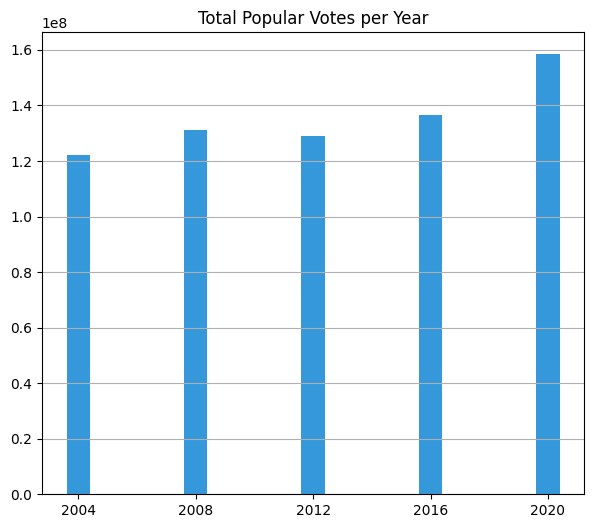

In [14]:
total20 = main_party_votes.iloc[:, 1:2].sum()
total16 = main_party_votes.iloc[:, 4:5].sum()
total12 = main_party_votes.iloc[:, 7:8].sum()
total08 = main_party_votes.iloc[:, 10:11].sum()
total04 = main_party_votes.iloc[:, 13:14].sum()

totalvote = total04.tolist() + total08.tolist() + total12.tolist() + total16.tolist() + total20.tolist()
per_year = [2004, 2008, 2012, 2016, 2020]

plt.figure(figsize=(7, 6))
plt.bar(per_year, totalvote)
plt.xticks(per_year)
plt.grid(axis='y')
plt.title('Total Popular Votes per Year') 
plt.savefig("Total Popular Votes per Year.png")
plt.show()

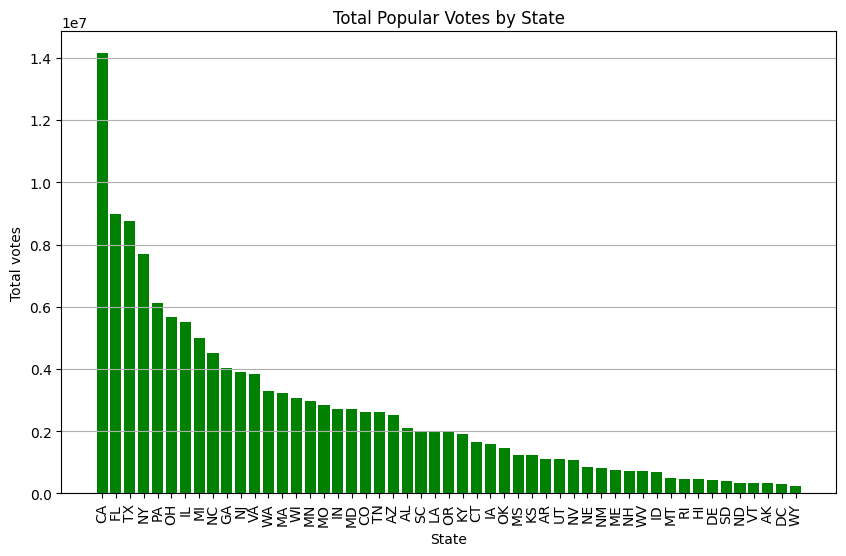

In [15]:
# ElectoralPopVote04['POPULAR VOTE/ Total Vote']

col = 'POPULAR VOTE/ Total Vote'
totalvote = ElectoralPopVote04[col] + ElectoralPopVote08[col] + ElectoralPopVote12[col] +  \
            ElectoralPopVote16[col] + ElectoralPopVote20[col]
totalvote /= 5
totalvote = totalvote[:-1]
states = ElectoralPopVote16.iloc[:-1, 0]

sorted_idx = np.argsort(totalvote)[::-1]
states = states[sorted_idx]
totalvote = totalvote[sorted_idx]

plt.figure(figsize=(10,6))
plt.bar(states, totalvote, color='green')
plt.xlabel('State')
plt.ylabel('Total votes')
plt.title('Total Popular Votes by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("Total Popular Votes by State")
plt.show()

In [16]:
# Pres Popular Vote
STATE = ElectoralPopVote16['STATE'].values

PresPopularVote00_88 = df = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2000.xlsx", sheet_name=sheet_names00_88[0])
PresPopularVote00_88.columns = PresPopularVote00_88.iloc[0]
PresPopularVote00_88 = PresPopularVote00_88.iloc[1:53]
PresPopularVote00_88.drop([PresPopularVote00_88.columns[3],PresPopularVote00_88.columns[6], PresPopularVote00_88.columns[9]], axis=1, inplace=True)
PresPopularVote00_88.rename(columns={'State':'STATE_NAME'}, inplace=True)
PresPopularVote00_88.reset_index(inplace=True, drop=True)
PresPopularVote00_88.insert(1, 'STATE', STATE)
display(PresPopularVote00_88)

/usr/local/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/1958854575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PresPopularVote00_88.drop([PresPopularVote00_88.columns[3],PresPopularVote00_88.columns[6], PresPopularVote00_88.columns[9]], axis=1, inplace=True)
/var/folders/k6/q300_jjd645b_1zn_l3crbp00000gn/T/ipykernel_68185/1958854575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PresPopular

,STATE_NAME,STATE,GORE (D) 2000,BUSH (R) 2000,CLINTON(D) 1996,DOLE (R) 1996,CLINTON (D) 1992,BUSH (R) 1992,DUKAKIS (D) 1988,BUSH (R) 1988
0,Alabama,AL,41.57,56.48,43.16,50.12,40.88,47.64,39.86,59.17
1,Alaska,AK,27.67,58.62,33.27,50.8,30.29,39.46,36.27,59.59
2,Arizona,AZ,44.73,51.02,46.52,44.29,36.52,38.47,38.74,59.95
3,Arkansas,AR,45.86,51.31,53.74,36.8,53.21,35.48,42.19,56.37
4,California,CA,53.45,41.65,51.1,38.21,46.01,32.61,47.56,51.13
5,Colorado,CO,42.39,50.75,44.43,45.8,40.13,35.87,45.28,53.06
6,Connecticut,CT,55.91,38.44,52.83,34.69,42.21,35.78,46.87,51.98
7,Delaware,DE,54.96,41.9,51.82,36.58,43.51,35.31,43.48,55.88
8,D.C.,DC,85.16,8.95,85.19,9.34,84.64,9.1,82.65,14.3
9,Florida,FL,48.84,48.85,48.02,42.32,39,40.89,38.51,60.87


In [17]:
candidate = main_party_votes.iloc[:-1, 0].values.tolist() + main_party_votes.iloc[:-1, 3].values.tolist() \
            + main_party_votes.iloc[:-1, 6].values.tolist() + main_party_votes.iloc[:-1, 9].values.tolist() \
            + main_party_votes.iloc[:-1, 12].values[::-1].tolist()
year = [2020, 2020, 2016, 2016, 2012, 2012, 2008, 2008, 2004, 2004]
party = ['D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R']

for_columns = [x.split(' ')[-1].strip() for x in candidate]
for_columns[2] = 'H.Cliton'
for_columns = [f"{x} ({y}) {z}" for x, y, z in zip(for_columns, party, year)]
print(for_columns)

['Biden (D) 2020', 'Trump (R) 2020', 'H.Cliton (D) 2016', 'Trump (R) 2016', 'Obama (D) 2012', 'Romney (R) 2012', 'Obama (D) 2008', 'McCain (R) 2008', 'Kerry (D) 2004', 'Bush (R) 2004']


In [18]:
candidate = main_party_votes.iloc[:-1, 0].values.tolist() + main_party_votes.iloc[:-1, 3].values.tolist() \
            + main_party_votes.iloc[:-1, 6].values.tolist() + main_party_votes.iloc[:-1, 9].values.tolist() \
            + main_party_votes.iloc[:-1, 12].values[::-1].tolist()
year = [2020, 2020, 2016, 2016, 2012, 2012, 2008, 2008, 2004, 2004]
party = ['D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R']

for_columns = [x.split(' ')[-1].strip() for x in candidate]
for_columns[2] = 'H.Cliton'
for_columns = [f"{x} ({y}) {z}" for x, y, z in zip(for_columns, party, year)]
print(for_columns)
def pop_pt_cal(df, idx):
    PopVote = df[df.columns[3:7]].copy()
    PopVote[PopVote.columns[0]] = PopVote[PopVote.columns[0]] / PopVote[PopVote.columns[-1]]*100
    PopVote[PopVote.columns[1]] = PopVote[PopVote.columns[1]] / PopVote[PopVote.columns[-1]]*100
    
    PopVote[PopVote.columns[0]] = PopVote[PopVote.columns[0]].apply(lambda x: f"{x:.2f}")
    PopVote[PopVote.columns[1]] = PopVote[PopVote.columns[1]].apply(lambda x: f"{x:.2f}")

    PopVote = PopVote[PopVote.columns[:2]]

    if idx in (2,8):
        reversed_columns = PopVote.columns[::-1]
        PopVote = PopVote[reversed_columns]
        
    PopVote.columns = for_columns[idx:idx + 2]
    
    return PopVote

result00_20 = PresPopularVote00_88[PresPopularVote00_88.columns[:2]].copy()

dfs = [ElectoralPopVote20, ElectoralPopVote16, ElectoralPopVote12, ElectoralPopVote08, ElectoralPopVote04]

for i, df in enumerate(dfs):
    PopVote = pop_pt_cal(df, i*2)
    result00_20 = pd.concat([result00_20, PopVote], axis=1)

cand_result = pd.concat([result00_20, PresPopularVote00_88[PresPopularVote00_88.columns[2:]]], axis=1)    
cand_result.rename(columns={'CLINTON(D) 1996':'CLINTON (D) 1996'}, inplace=True)

# object to float 
numeric_cols = cand_result.columns[2:]
for col in numeric_cols:
    cand_result[col] = pd.to_numeric(cand_result[col], errors='coerce') # coerce: 숫자 변환할 수 없는 값 있는 경우 NaN

display(cand_result)
cand_result.to_csv(f'{dir_path}candidate88_20.csv', index=False) # 회차별 각 주당 두 정당의 Poopular vote 비율

['Biden (D) 2020', 'Trump (R) 2020', 'H.Cliton (D) 2016', 'Trump (R) 2016', 'Obama (D) 2012', 'Romney (R) 2012', 'Obama (D) 2008', 'McCain (R) 2008', 'Kerry (D) 2004', 'Bush (R) 2004']


,STATE_NAME,STATE,Biden (D) 2020,Trump (R) 2020,H.Cliton (D) 2016,Trump (R) 2016,Obama (D) 2012,Romney (R) 2012,Obama (D) 2008,McCain (R) 2008,Kerry (D) 2004,Bush (R) 2004,GORE (D) 2000,BUSH (R) 2000,CLINTON (D) 1996,DOLE (R) 1996,CLINTON (D) 1992,BUSH (R) 1992,DUKAKIS (D) 1988,BUSH (R) 1988
0,Alabama,AL,36.57,62.03,34.36,62.08,38.36,60.55,38.74,60.32,36.84,62.46,41.57,56.48,43.16,50.12,40.88,47.64,39.86,59.17
1,Alaska,AK,42.77,52.83,36.55,51.28,40.81,54.80,37.89,59.42,35.52,61.07,27.67,58.62,33.27,50.80,30.29,39.46,36.27,59.59
2,Arizona,AZ,49.36,49.06,45.13,48.67,44.59,53.65,45.12,53.64,44.40,54.87,44.73,51.02,46.52,44.29,36.52,38.47,38.74,59.95
3,Arkansas,AR,34.78,62.40,33.65,60.57,36.88,60.57,38.86,58.72,44.55,54.31,45.86,51.31,53.74,36.80,53.21,35.48,42.19,56.37
4,California,CA,63.48,34.32,61.73,31.62,60.24,37.12,61.01,36.95,54.30,44.36,53.45,41.65,51.10,38.21,46.01,32.61,47.56,51.13
5,Colorado,CO,55.40,41.90,48.16,43.25,51.49,46.13,53.66,44.71,47.02,51.69,42.39,50.75,44.43,45.80,40.13,35.87,45.28,53.06
6,Connecticut,CT,59.26,39.19,54.57,40.93,58.06,40.73,60.59,38.22,54.31,43.95,55.91,38.44,52.83,34.69,42.21,35.78,46.87,51.98
7,Delaware,DE,58.74,39.77,53.09,41.71,58.61,39.98,61.94,36.95,53.35,45.75,54.96,41.90,51.82,36.58,43.51,35.31,43.48,55.88
8,D.C.,DC,92.15,5.40,90.86,4.09,90.91,7.28,92.46,6.53,89.18,9.34,85.16,8.95,85.19,9.34,84.64,9.10,82.65,14.30
9,Florida,FL,47.86,51.22,47.82,49.02,50.01,49.13,51.03,48.22,47.09,52.10,48.84,48.85,48.02,42.32,39.00,40.89,38.51,60.87


In [19]:
display(gap_df.head())

colors = sns.color_palette('husl', n_colors=len(gap_columns))

plt.figure(figsize=(20,10))
plt.axhline(y=0, color='black')
for i, col in enumerate(gap_columns):
    plt.plot(gap_df['STATE'], gap_df[col], marker='.', label=col, color=colors[i])

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.title("Gap per Year", fontsize=20)
plt.savefig("Gap per Year.png")
plt.show()

plt.figure(figsize=(20,7))
plt.axhline(y=0, color='black')
for i, col in enumerate(gap_columns):
    # plt.plot(gap_df['STATE'], gap_df[col], marker='.', label=col, color=colors[i])
    colors = ['#3498db' if v > 0 else '#e74c3c' for v in gap_df[col]]
    plt.bar(gap_df['STATE'], gap_df[col], color=colors, alpha=0.25)

plt.grid(axis='y', linestyle='--')
plt.title("Trends by State", fontsize=20)
plt.savefig("Trends by State.png")
plt.show()

NameError: name 'gap_df' is not defined

In [29]:
state_result = cand_result.T
state_result.reset_index(inplace=True)
state_result.columns = state_result.iloc[1]
state_result = state_result[2:]
state_result.rename_axis(None, axis=1, inplace=True)
state_result.reset_index(inplace=True, drop=True)
state_result.rename(columns={'Total:   ':'Total (%)'}, inplace=True)

cand1 = state_result['STATE'].apply(lambda x: x.split(' ')[0])
party1 = state_result['STATE'].apply(lambda x: x.split(' ')[1]).str.extract(r'\((.*?)\)')
year1 = state_result['STATE'].apply(lambda x: x.split(' ')[2])

state_result.insert(0, 'YEAR', year1)
state_result.insert(1, 'PARTY', party1)
state_result.insert(2, 'CANDIDATE', cand1)
state_result.drop(columns='STATE', inplace=True)

numeric_cols = ['YEAR'] + list(state_result.columns[3:])
for col in numeric_cols:
    state_result[col] = pd.to_numeric(state_result[col], errors='coerce') # coerce: 숫자 변환할 수 없는 값 있는 경우 NaN

# 정리 잘 (맞게 계산)되었는지 일치하는지 확인
# display(VoteResult)
display(state_result)

,YEAR,PARTY,CANDIDATE,AL,AK,AZ,AR,CA,CO,CT,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,Total (%)
0,2020,D,Biden,36.57,42.77,49.36,34.78,63.48,55.40,59.26,...,37.45,46.48,37.65,66.09,54.11,57.97,29.69,49.45,26.55,51.31
1,2020,R,Trump,62.03,52.83,49.06,62.40,34.32,41.90,39.19,...,60.66,52.06,58.13,30.67,44.00,38.77,68.62,48.82,69.94,46.85
2,2016,D,H.Cliton,34.36,36.55,45.13,33.65,61.73,48.16,54.57,...,34.72,43.24,27.46,56.68,49.73,52.54,26.43,46.45,21.88,48.18
3,2016,R,Trump,62.08,51.28,48.67,60.57,31.62,43.25,40.93,...,60.72,52.23,45.54,30.27,44.41,36.83,68.50,47.22,68.17,46.09
4,2012,D,Obama,38.36,40.81,44.59,36.88,60.24,51.49,58.06,...,39.08,41.38,24.75,66.57,51.16,56.16,35.54,52.83,27.82,51.06
5,2012,R,Romney,60.55,54.80,53.65,60.57,37.12,46.13,40.73,...,59.48,57.17,72.79,30.97,47.28,41.29,62.30,45.89,68.64,47.20
6,2008,D,Obama,38.74,37.89,45.12,38.86,61.01,53.66,60.59,...,41.83,43.68,34.41,67.46,52.63,57.65,42.59,56.22,32.54,52.93
7,2008,R,McCain,60.32,59.42,53.64,58.72,36.95,44.71,38.22,...,56.90,55.45,62.58,30.45,46.33,40.48,55.71,42.31,64.78,45.65
8,2004,D,Kerry,36.84,35.52,44.40,44.55,54.30,47.02,54.31,...,42.53,38.22,26.00,58.94,45.48,52.82,43.20,49.70,29.07,48.27
9,2004,R,Bush,62.46,61.07,54.87,54.31,44.36,51.69,43.95,...,56.80,61.09,71.54,38.80,53.68,45.64,56.06,49.32,68.86,50.73


In [30]:
scaled_cand_result = cand_result.copy()

reversed_columns = scaled_cand_result.columns[::-1]
cols = ['STATE_NAME', 'STATE']
cols.extend(reversed_columns[:-2])

for i in range(len(cand_result)-1):
    scaled_cand_result.iloc[i, 2:] /= scaled_cand_result.iloc[-1, 2:]


scaled_cand_result = scaled_cand_result[cols]
scaled_cand_result = scaled_cand_result.iloc[:-1]
scaled_cand_result

,STATE_NAME,STATE,BUSH (R) 1988,DUKAKIS (D) 1988,BUSH (R) 1992,CLINTON (D) 1992,DOLE (R) 1996,CLINTON (D) 1996,BUSH (R) 2000,GORE (D) 2000,Bush (R) 2004,Kerry (D) 2004,McCain (R) 2008,Obama (D) 2008,Romney (R) 2012,Obama (D) 2012,Trump (R) 2016,H.Cliton (D) 2016,Trump (R) 2020,Biden (D) 2020
0,Alabama,AL,1.108675,0.873165,1.272096,0.950477,1.231147,0.876523,1.179862,0.859239,1.231224,0.763207,1.321358,0.731910,1.282839,0.751273,1.346930,0.713159,1.324013,0.712727
1,Alaska,AK,1.116545,0.794524,1.053672,0.704255,1.247851,0.675670,1.224567,0.571931,1.203824,0.735861,1.301643,0.715851,1.161017,0.799256,1.112606,0.758614,1.127641,0.833561
2,Arizona,AZ,1.123290,0.848631,1.027236,0.849105,1.087939,0.944760,1.065803,0.924556,1.081609,0.919826,1.175027,0.852447,1.136653,0.873286,1.055977,0.936696,1.047172,0.961996
3,Arkansas,AR,1.056211,0.924206,0.947397,1.237154,0.903955,1.091389,1.071861,0.947912,1.070570,0.922933,1.286309,0.734177,1.283263,0.722288,1.314168,0.698423,1.331910,0.677841
4,California,CA,0.958029,1.041840,0.870761,1.069751,0.938590,1.037774,0.870065,1.104795,0.874433,1.124922,0.809419,1.152654,0.786441,1.179788,0.686049,1.281237,0.732551,1.237186
5,Colorado,CO,0.994191,0.991895,0.957810,0.933039,1.125031,0.902315,1.060163,0.876189,1.018924,0.974104,0.979409,1.013792,0.977331,1.008421,0.938381,0.999585,0.894344,1.079712
6,Connecticut,CT,0.973955,1.026725,0.955407,0.981400,0.852125,1.072908,0.803008,1.155643,0.866351,1.125129,0.837240,1.144719,0.862924,1.137094,0.888045,1.132628,0.836499,1.154941
7,Delaware,DE,1.047030,0.952464,0.942857,1.011625,0.898551,1.052396,0.875287,1.136007,0.901833,1.105241,0.809419,1.170225,0.847034,1.147865,0.904969,1.101910,0.848879,1.144806
8,D.C.,DC,0.267941,1.810515,0.242991,1.967914,0.229428,1.730097,0.186965,1.760232,0.184112,1.847524,0.143045,1.746835,0.154237,1.780454,0.088739,1.885845,0.115261,1.795946
9,Florida,FL,1.140528,0.843593,1.091856,0.906766,1.039548,0.975223,1.020472,1.009508,1.027006,0.975554,1.056298,0.964104,1.040890,0.979436,1.063571,0.992528,1.093276,0.932762


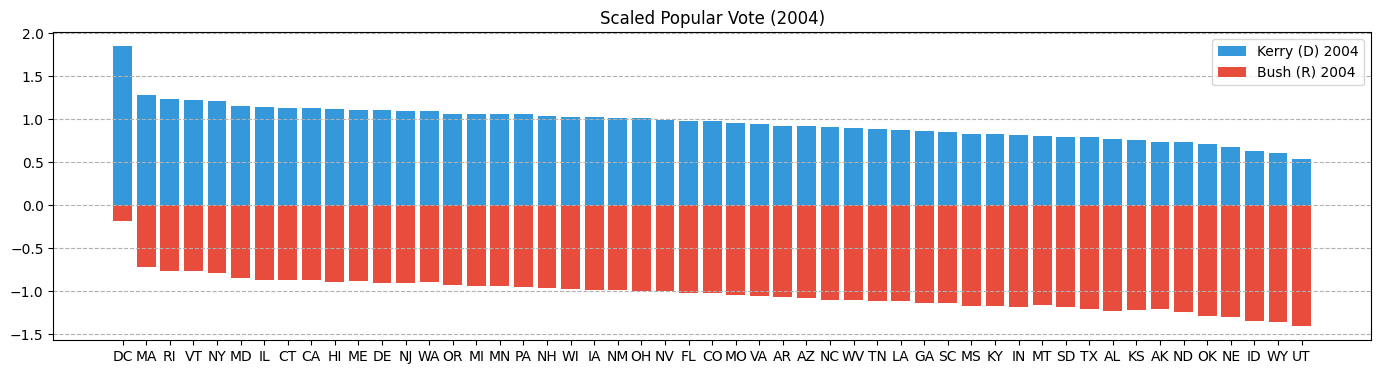

In [31]:
columns = scaled_cand_result.columns

def sort_plot(n):
    sorted_df = scaled_cand_result.copy()
    sorted_df.sort_values(columns[n*2 + 3], ascending=False, inplace=True)

    plt.figure(figsize=(17,4))
    plt.bar(sorted_df['STATE'], sorted_df[sorted_df.columns[n*2 + 3]], color='#3498db', label=columns[n*2 + 3]) 
    plt.bar(sorted_df['STATE'], -sorted_df[sorted_df.columns[n*2 + 2]], color='#e74c3c', label=columns[n*2 + 2]) 
    # plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    plt.grid(axis='y', linestyle='--')
    plt.title(f'Scaled Popular Vote ({1988 + n*4})')
    plt.legend()


sort_plot(4)

plt.show()

In [32]:
PresGeneralResults20 = pd.read_excel("/Users/songsooyeoun/Desktop/USElection/federalelections2020.xlsx", sheet_name=sheet_names20[8])

state_name = PresGeneralResults20['STATE'].unique()[1:-1].tolist()
state = PresGeneralResults20['STATE ABBREVIATION'].unique()[1:-1].tolist()
state_dict = dict(zip(state, state_name))

def fullname(state):
    for key, value in state_dict.items():
        if key == state:
            return value

,STATE,Gap1988,Gap1992,Gap1996,Gap2000,Gap2004,Gap2008,Gap2012,Gap2016,Gap2020
0,AL,-0.235510,-0.321619,-0.354624,-0.320623,-0.468017,-0.589448,-0.531566,-0.633771,-0.611286
1,AK,-0.322021,-0.349417,-0.572180,-0.652636,-0.467963,-0.585792,-0.361761,-0.353992,-0.294081
2,AZ,-0.274659,-0.178131,-0.143179,-0.141248,-0.161783,-0.322581,-0.263366,-0.119282,-0.085176
3,AR,-0.132005,0.289758,0.187434,-0.123949,-0.147636,-0.552132,-0.560975,-0.615745,-0.654070
4,CA,0.083811,0.198990,0.099184,0.234731,0.250489,0.343235,0.393348,0.595188,0.504635


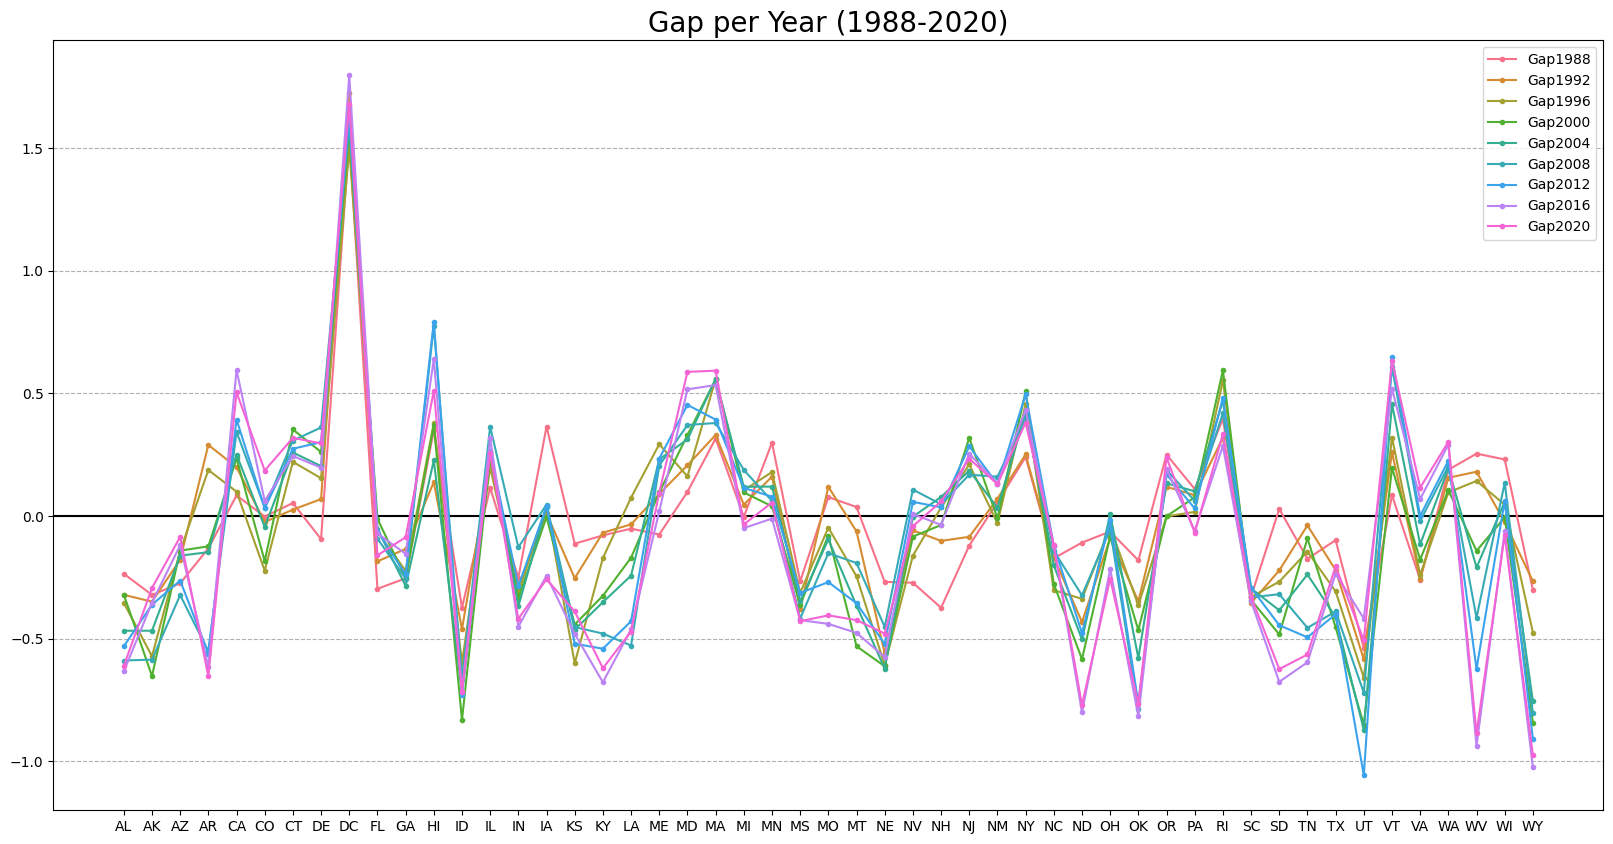

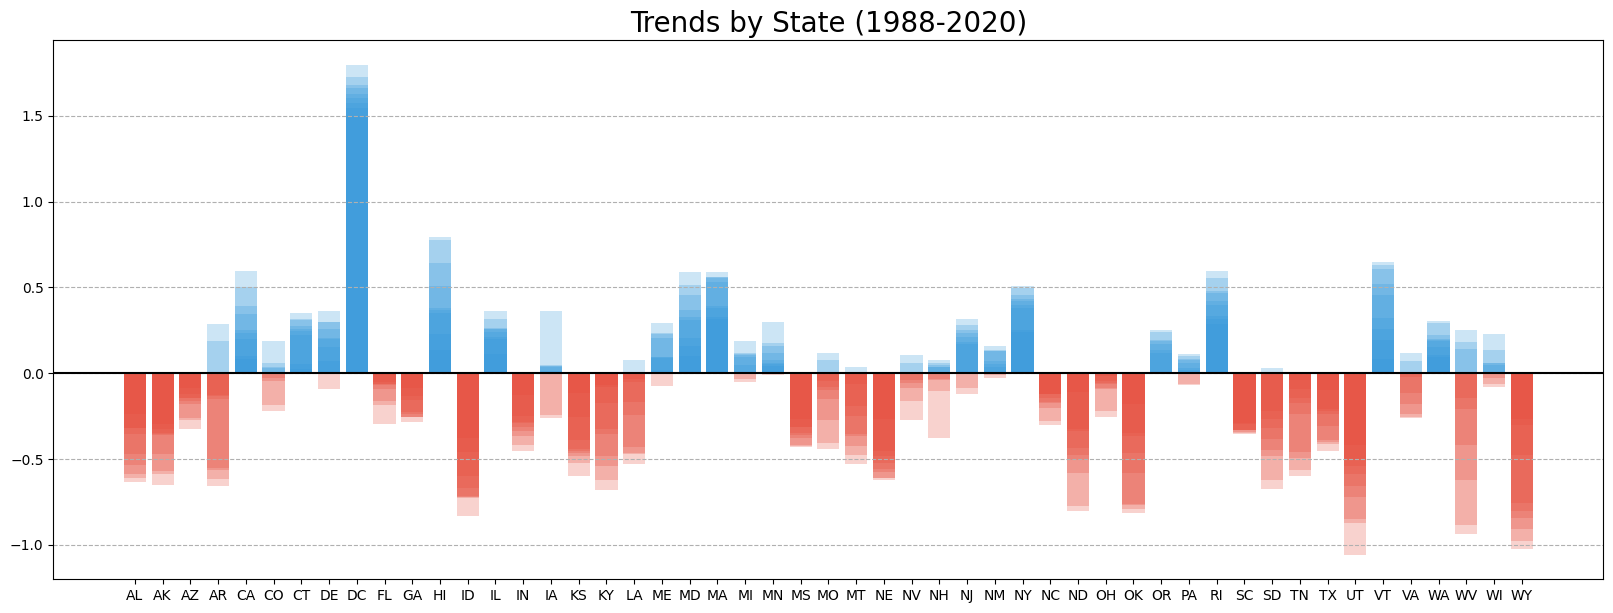

In [33]:
gap_df = scaled_cand_result['STATE'].copy().to_frame()
gap_columns = ['Gap1988', 'Gap1992', 'Gap1996', 'Gap2000', 'Gap2004', 'Gap2008', 'Gap2012', 'Gap2016', 'Gap2020']

idx = 3

for col in gap_columns:
    gap_df[col] = scaled_cand_result[columns[idx]] - scaled_cand_result[columns[idx-1]]
    idx += 2

display(gap_df.head())

colors = sns.color_palette('husl', n_colors=len(gap_columns))

plt.figure(figsize=(20,10))
plt.axhline(y=0, color='black')
for i, col in enumerate(gap_columns):
    plt.plot(gap_df['STATE'], gap_df[col], marker='.', label=col, color=colors[i])

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.title("Gap per Year (1988-2020)", fontsize=20)
plt.savefig("Gap per Year.png")
plt.show()

plt.figure(figsize=(20,7))
plt.axhline(y=0, color='black')
for i, col in enumerate(gap_columns):
    # plt.plot(gap_df['STATE'], gap_df[col], marker='.', label=col, color=colors[i])
    colors = ['#3498db' if v > 0 else '#e74c3c' for v in gap_df[col]]
    plt.bar(gap_df['STATE'], gap_df[col], color=colors, alpha=0.25)

plt.grid(axis='y', linestyle='--')
plt.title("Trends by State (1988-2020)", fontsize=20)
plt.savefig("Trends by State.png")
plt.show()

In [34]:
gap_df['AVG'] = gap_df[gap_df.columns[1:]].mean(axis=1)
gap_df['AVG'] = np.abs(gap_df['AVG'])
print("Wisconsin, Misigan, Nevada, Pennsylvania, Arizona, Georgia, North Carolina\n")
possible_swing = gap_df.sort_values('AVG')['STATE'].values[:10]
possible_swing = possible_swing.tolist()
for state in possible_swing:
    fullname(state)

Wisconsin, Misigan, Nevada, Pennsylvania, Arizona, Georgia, North Carolina



In [35]:
scaled_state_result = state_result.copy()

for i in range(51):
    scaled_state_result[scaled_state_result.columns[i+3]] = scaled_state_result[scaled_state_result.columns[i+3]] / scaled_state_result['Total (%)']
scaled_state_result.drop(columns='Total (%)', inplace=True)
scaled_state_result = scaled_state_result.iloc[::-1]
scaled_state_result.reset_index()
display(scaled_state_result)

democrat  = scaled_state_result[scaled_state_result['PARTY']=='D']
republican = scaled_state_result[scaled_state_result['PARTY']=='R']

# fig, ax1 = plt.subplots(figsize=(10,5))
# plt.plot(democrat['YEAR'], democrat['AL'])
# plt.xticks(democrat04_20['YEAR']) # x값 연도로 고정

,YEAR,PARTY,CANDIDATE,AL,AK,AZ,AR,CA,CO,CT,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
17,1988,R,BUSH,1.108675,1.116545,1.123290,1.056211,0.958029,0.994191,0.973955,...,0.990257,1.084692,1.048342,1.240772,0.957467,1.119355,0.908001,0.889264,0.895634,1.134158
16,1988,D,DUKAKIS,0.873165,0.794524,0.848631,0.924206,1.041840,0.991895,1.026725,...,1.018839,0.910186,0.949617,0.702081,1.042278,0.859365,1.096386,1.143483,1.126177,0.832640
15,1992,R,BUSH,1.272096,1.053672,1.027236,0.947397,0.870761,0.957810,0.955407,...,1.085714,1.132977,1.083044,1.157810,0.812283,1.200534,0.853405,0.944993,0.982109,1.056342
14,1992,D,CLINTON,0.950477,0.704255,0.849105,1.237154,1.069751,0.933039,0.981400,...,0.863520,1.094629,0.862125,0.573123,1.072076,0.943734,1.009068,1.125552,0.956289,0.790049
13,1996,R,DOLE,1.231147,1.247851,1.087939,0.903955,0.938590,1.125031,0.852125,...,1.141980,1.119872,1.197740,1.335544,0.763694,1.156964,0.916237,0.902972,0.945222,1.223532
12,1996,D,CLINTON,0.876523,0.675670,0.944760,1.091389,1.037774,0.902315,1.072908,...,0.873883,0.974817,0.890130,0.676279,1.083469,0.916937,1.012185,1.045898,0.991267,0.748172
11,2000,R,BUSH,1.179862,1.224567,1.065803,1.071861,0.870065,1.060163,0.803008,...,1.259662,1.068519,1.238772,1.396073,0.850219,1.096094,0.931272,1.084604,0.994569,1.415500
10,2000,D,GORE,0.859239,0.571931,0.924556,0.947912,1.104795,0.876189,1.155643,...,0.776354,0.977263,0.785035,0.544440,1.046507,0.918561,1.036792,0.942332,0.988632,0.572551
9,2004,R,Bush,1.231224,1.203824,1.081609,1.070570,0.874433,1.018924,0.866351,...,1.180958,1.119653,1.204218,1.410211,0.764833,1.058151,0.899665,1.105066,0.972206,1.357382
8,2004,D,Kerry,0.763207,0.735861,0.919826,0.922933,1.124922,0.974104,1.125129,...,0.796354,0.881086,0.791796,0.538637,1.221048,0.942200,1.094261,0.894966,1.029625,0.602237


----
# **Swing State**

In [36]:
Vote04_20 = ElectoralPopVote16['STATE'].copy().to_frame()

won_cols = ['Won04', 'Won08', 'Won12', 'Won16', 'Won20']
gap_cols = ['Gap04', 'Gap08', 'Gap12', 'Gap16', 'Gap20']
total_pop_cols = ['TotalPop04', 'TotalPop08', 'TotalPop12', 'TotalPop16', 'TotalPop20']
turnout_cols = ['Turnout04', 'Turnout08', 'Turnout12', 'Turnout16', 'Turnout20']

dfs = [ElectoralPopVote20, ElectoralPopVote16, ElectoralPopVote12, ElectoralPopVote08, ElectoralPopVote04]
dfs = dfs[::-1]


for i, df in enumerate(dfs):
    Vote04_20[won_cols[i]] = df['WON_PARTY'].copy()
    
for i, df in enumerate(dfs):
    Vote04_20[gap_cols[i]] = df['GAP_pt'].copy()

# for i, df in enumerate(dfs):
#     Vote04_20[total_pop_cols[i]] = df['POPULAR VOTE/ Total Vote'].copy()

for i, df in enumerate(dfs):
    Vote04_20[turnout_cols[i]] = df['Turnout'].copy()

# !!!
Vote04_20['Correspond'] = (Vote04_20['Won04'] == Vote04_20['Won08']) & \
                          (Vote04_20['Won08'] == Vote04_20['Won12']) & \
                          (Vote04_20['Won12'] == Vote04_20['Won16']) & \
                          (Vote04_20['Won16'] == Vote04_20['Won20'])

Vote04_20['Correspond'] = Vote04_20.apply(lambda row: row['Won04'] if row['Correspond'] else 'Swing', axis=1)

demo_st = Vote04_20[Vote04_20['Correspond'] == 'D'][['STATE'] + gap_cols + turnout_cols]
repub_st = Vote04_20[Vote04_20['Correspond'] == 'R'][['STATE'] + gap_cols + turnout_cols]
swing_st = Vote04_20[Vote04_20['Correspond'] == 'Swing'][['STATE'] + gap_cols + turnout_cols]
swing_st = swing_st.iloc[:-1] # Total 제외

winner = Vote04_20.iloc[-1, 1:6].values

ls = Vote04_20['Correspond'][:-1].value_counts().tolist()
print(Vote04_20['Correspond'][:-1].value_counts())
print('\nDemocrat/   ', *demo_st['STATE'].unique().tolist())
print('Republican/ ', *repub_st['STATE'].unique().tolist())
print('Swing/      ', *swing_st['STATE'].unique().tolist(), '\n')

numeric_cols = Vote04_20.columns[6:-1]
for col in numeric_cols:
    Vote04_20[col] = pd.to_numeric(Vote04_20[col], errors='coerce') 
    
display(Vote04_20)
Vote04_20.to_csv(f'{dir_path}Election Result Details.csv', index=False)

Correspond
R        19
Swing    16
D        16
Name: count, dtype: int64

Democrat/    CA CT DE DC HI IL MD MA MN NH NJ NY OR RI VT WA
Republican/  AL AK AR ID KS KY LA MS MO MT ND OK SC SD TN TX UT WV WY
Swing/       AZ CO FL GA IN IA ME MI NE NV NM NC OH PA VA WI 



,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond
0,AL,R,R,R,R,R,-0.256158,-0.215765,-0.221868,-0.277251,-0.254617,0.000005,0.000004,0.000004,0.000004,0.000004,R
1,AK,R,R,R,R,R,-0.255485,-0.215351,-0.139889,-0.147306,-0.100612,0.000010,0.000009,0.000010,0.000009,0.000008,R
2,AZ,R,R,R,R,D,-0.104726,-0.085200,-0.090648,-0.035456,0.003087,0.000005,0.000004,0.000005,0.000004,0.000003,Swing
3,AR,R,R,R,R,R,-0.097583,-0.198512,-0.236879,-0.269200,-0.276207,0.000006,0.000006,0.000006,0.000005,0.000005,R
4,CA,D,D,D,D,D,0.099475,0.240578,0.231186,0.301093,0.291641,0.000004,0.000004,0.000004,0.000004,0.000003,D
5,CO,R,D,D,D,D,-0.046717,0.089530,0.053652,0.049055,0.135016,0.000004,0.000004,0.000004,0.000003,0.000003,Swing
6,CT,D,D,D,D,D,0.103664,0.223673,0.173315,0.136394,0.200736,0.000004,0.000004,0.000004,0.000004,0.000004,D
7,DE,D,D,D,D,D,0.075940,0.249956,0.186267,0.113732,0.189681,0.000008,0.000007,0.000007,0.000007,0.000006,D
8,DC,D,D,D,D,D,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000011,0.000010,0.000010,0.000009,D
9,FL,R,D,D,R,R,-0.050064,0.028180,0.008769,-0.011986,-0.033584,0.000004,0.000003,0.000003,0.000003,0.000003,Swing


,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.057585,0.042878,0.000256,-0.036681,-0.005736,0.000006,0.000005,0.000005,0.000005,0.000004
std,0.207429,0.220852,0.235407,0.238214,0.240245,0.000002,0.000002,0.000002,0.000002,0.000002
min,-0.455403,-0.322354,-0.480409,-0.462953,-0.433827,0.000003,0.000003,0.000003,0.000002,0.000003
25%,-0.201825,-0.131476,-0.176151,-0.200309,-0.175774,0.000004,0.000004,0.000004,0.000004,0.000003
50%,-0.050064,0.045937,0.029793,-0.035456,0.002356,0.000005,0.000004,0.000004,0.000004,0.000004
75%,0.069327,0.168248,0.150783,0.111755,0.160120,0.000007,0.000006,0.000006,0.000006,0.000005
max,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000012,0.000012,0.000012,0.000011


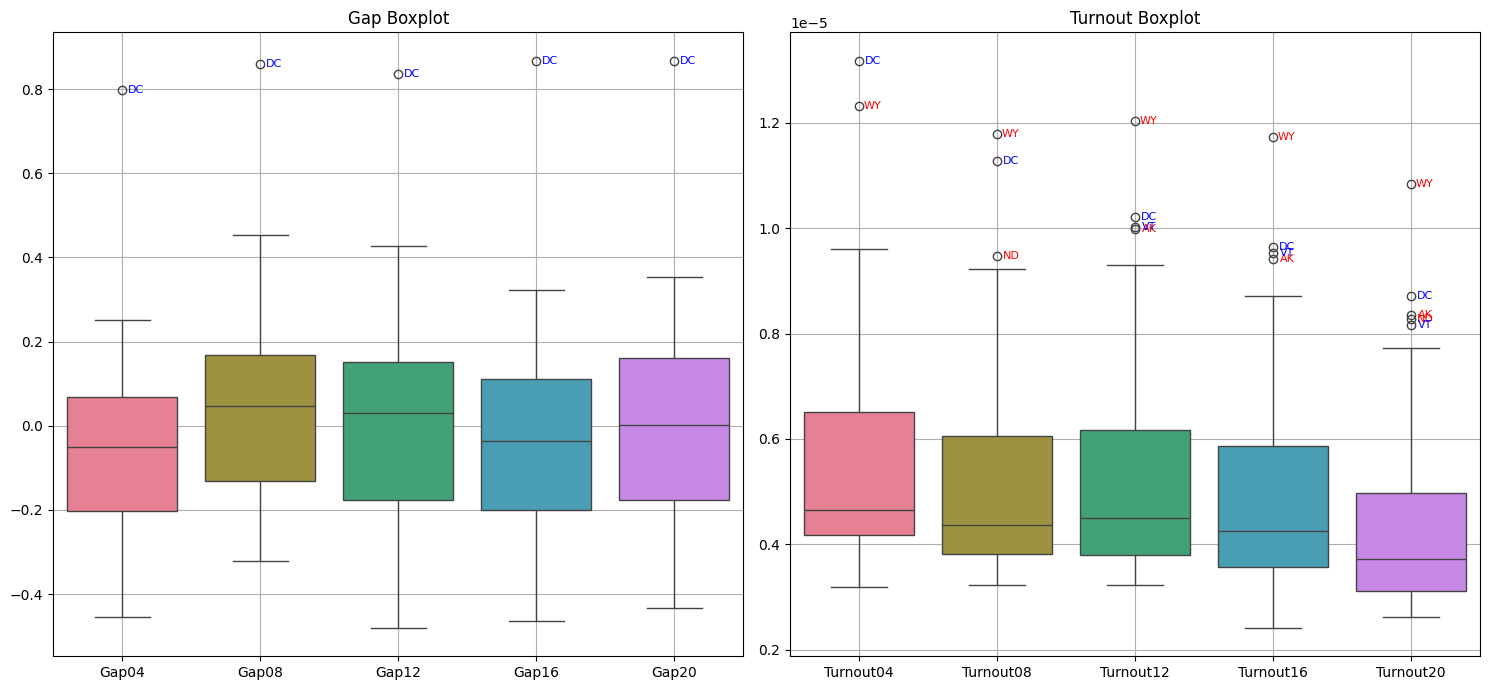

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics
wo_Vote04_20 = Vote04_20.iloc[:-1].copy()
display(wo_Vote04_20.describe())

# Function to annotate outliers
def annotate_outliers(data, col, col_index, ax):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    for index in outliers.index:
        if outliers['Correspond'].loc[index] == 'D':
            c = 'blue'
        elif outliers['Correspond'].loc[index] == 'R':
            c = 'red'
        else:
            c = 'gray'
            
        ax.annotate(outliers['STATE'].loc[index], xy=(col_index, outliers[col].loc[index]),
                    xytext=(10, 0), textcoords='offset points', ha='center', va='center',
                    fontsize=8, color=c)

plt.figure(figsize=(15, 7))

# Plot for gap_cols
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=wo_Vote04_20[gap_cols], ax=ax1)
plt.title("Gap Boxplot")
plt.xticks(range(len(gap_cols)), gap_cols)
plt.grid()
for i, col in enumerate(gap_cols):
    annotate_outliers(wo_Vote04_20, col, i, ax1)

# Plot for turnout_cols
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=wo_Vote04_20[turnout_cols], ax=ax2)
plt.title("Turnout Boxplot")
plt.xticks(range(len(turnout_cols)), turnout_cols)
plt.grid()
for i, col in enumerate(turnout_cols):
    annotate_outliers(wo_Vote04_20, col, i, ax2)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig("Gap and Turnout Distribution.png")
plt.show()

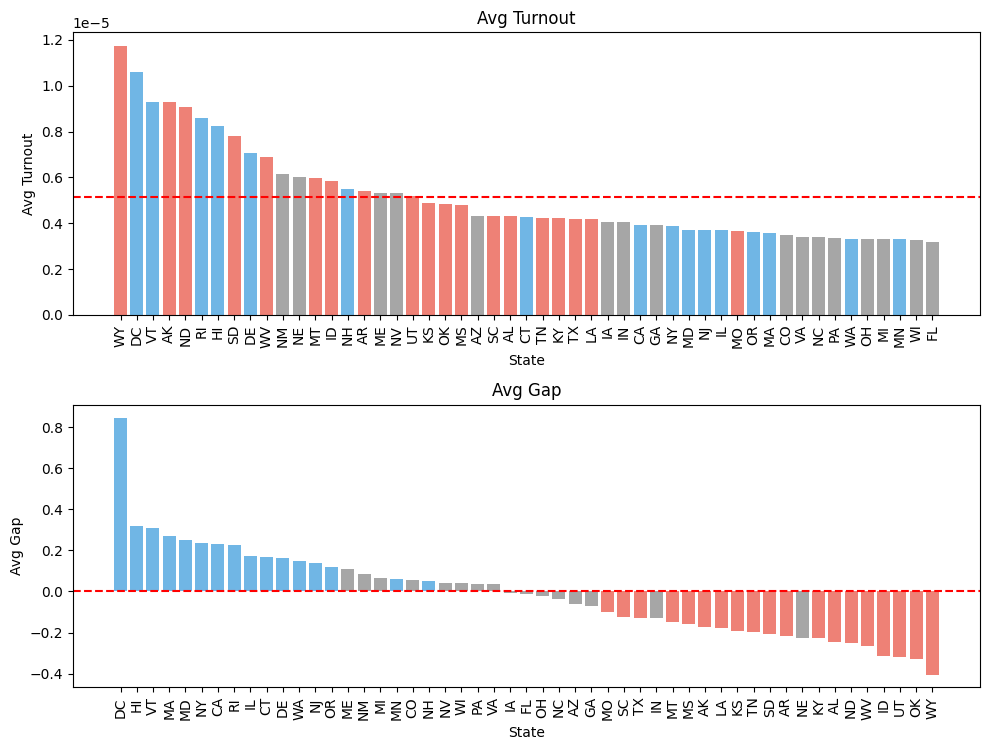

In [38]:
Vote04_20['AvgGap'] = Vote04_20[gap_cols].mean(axis=1)
Vote04_20['AvgTurnout'] = Vote04_20[turnout_cols].mean(axis=1)

sorted_avg_gap = Vote04_20[['STATE', 'AvgGap', 'Correspond']].iloc[:-1].sort_values(by='AvgGap', ascending=False)
sorted_avg_turnout = Vote04_20[['STATE', 'AvgTurnout','Correspond']].iloc[:-1].sort_values(by='AvgTurnout', ascending=False)
total_avg = Vote04_20['AvgTurnout'].mean()

Vote04_20.drop(columns=['AvgGap', 'AvgTurnout'], inplace=True)

def assign_colors(df):
    colors = []
    for correspond in df['Correspond']:
        if correspond == 'R':
            colors.append('#e74c3c')
        elif correspond == 'D':
            colors.append('#3498db')
        else:
            colors.append('gray')
    return colors

colors_t = assign_colors(sorted_avg_turnout)
colors_g = assign_colors(sorted_avg_gap)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# First subplot for Avg Turnout
ax[0].bar(sorted_avg_turnout['STATE'], sorted_avg_turnout['AvgTurnout'], alpha=0.7, color=colors_t)
ax[0].axhline(total_avg, color='red', linestyle='--')
ax[0].set_title("Avg Turnout")
ax[0].set_xlabel("State")
ax[0].set_ylabel("Avg Turnout")
ax[0].tick_params(axis='x', rotation=90)

# Second subplot for Avg Gap
ax[1].bar(sorted_avg_gap['STATE'], sorted_avg_gap['AvgGap'], alpha=0.7, color=colors_g)
ax[1].axhline(total_avg, color='red', linestyle='--')
ax[1].set_title("Avg Gap")
ax[1].set_xlabel("State")
ax[1].set_ylabel("Avg Gap")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Avg Turnout and Gap by.png")
plt.show()

In [39]:
# R(1)(-) / D(0)(+) / Swing(2)
from sklearn.preprocessing import LabelEncoder

if len(Vote04_20) == 52:
    Vote04_20 = Vote04_20.iloc[:-1]
encoded_Vote04_20 = Vote04_20.copy()

str_cols = won_cols + ['Correspond']
numeric_cols = [col for col in list(Vote04_20.columns) if col not in str_cols]
numeric_cols = numeric_cols[1:]


le = LabelEncoder()
for col in str_cols:
    encoded_Vote04_20[col] = le.fit_transform(Vote04_20[col])

# scaler = MinMaxScaler()
# for col in numeric_cols:
#     encoded_Vote04_20[col] = scaler.fit_transform(Vote04_20[[col]])

for col in gap_cols:
    encoded_Vote04_20[col] = np.abs(encoded_Vote04_20[col])

display(encoded_Vote04_20)

e_blue_st = encoded_Vote04_20[encoded_Vote04_20['Correspond'] == 0][['STATE'] + gap_cols + turnout_cols]
e_red_st = encoded_Vote04_20[encoded_Vote04_20['Correspond'] == 1][['STATE'] + gap_cols + turnout_cols]
e_swing_st = encoded_Vote04_20[encoded_Vote04_20['Correspond'] == 2][['STATE'] + gap_cols + turnout_cols]
e_swing_st = e_swing_st

,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond
0,AL,1,1,1,1,1,0.256158,0.215765,0.221868,0.277251,0.254617,0.000005,0.000004,0.000004,0.000004,0.000004,1
1,AK,1,1,1,1,1,0.255485,0.215351,0.139889,0.147306,0.100612,0.000010,0.000009,0.000010,0.000009,0.000008,1
2,AZ,1,1,1,1,0,0.104726,0.085200,0.090648,0.035456,0.003087,0.000005,0.000004,0.000005,0.000004,0.000003,2
3,AR,1,1,1,1,1,0.097583,0.198512,0.236879,0.269200,0.276207,0.000006,0.000006,0.000006,0.000005,0.000005,1
4,CA,0,0,0,0,0,0.099475,0.240578,0.231186,0.301093,0.291641,0.000004,0.000004,0.000004,0.000004,0.000003,0
5,CO,1,0,0,0,0,0.046717,0.089530,0.053652,0.049055,0.135016,0.000004,0.000004,0.000004,0.000003,0.000003,2
6,CT,0,0,0,0,0,0.103664,0.223673,0.173315,0.136394,0.200736,0.000004,0.000004,0.000004,0.000004,0.000004,0
7,DE,0,0,0,0,0,0.075940,0.249956,0.186267,0.113732,0.189681,0.000008,0.000007,0.000007,0.000007,0.000006,0
8,DC,0,0,0,0,0,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000011,0.000010,0.000010,0.000009,0
9,FL,1,0,0,1,1,0.050064,0.028180,0.008769,0.011986,0.033584,0.000004,0.000003,0.000003,0.000003,0.000003,2


In [40]:
import requests

for_map  = encoded_Vote04_20.copy()
for_map['Correspond'] = for_map['Correspond'].map({0:2, 1:0, 2:1})

print('Democrat/   ', *demo_st['STATE'].unique().tolist())
print('Republican/ ', *repub_st['STATE'].unique().tolist())
print('Swing/      ', *swing_st['STATE'].unique().tolist(), '\n')

state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)
# avg_pop_m = ScaledVote12_20["AVG_TOTAL_POP_VOTE"].min()
# avg_pop_M = ScaledVote12_20["AVG_TOTAL_POP_VOTE"].max()
# linear = cm.LinearColormap(["blue", "red"], vmin=avg_pop_m, vmax=avg_pop_M

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=for_map,
    columns=['STATE', 'Correspond'],
    key_on='feature.id',
    fill_color='RdYlBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2004-2020 US Election'
).add_to(m)

for feature in choropleth.geojson.data['features']:
    state_name = feature['id']
    state_data = encoded_Vote04_20[for_map['STATE'] == state_name]
    if not state_data.empty:
        geometry = feature['geometry']
        if geometry['type'] == 'Polygon':
            coords = geometry['coordinates'][0]
        elif geometry['type'] == 'MultiPolygon':
            coords = geometry['coordinates'][0][0]

        centroid_lat = sum([point[1] for point in coords]) / len(coords)
        centroid_lon = sum([point[0] for point in coords]) / len(coords)

        folium.Marker(
            location=[centroid_lat, centroid_lon],
            icon=folium.DivIcon(html=f"<div style='font-size: 8pt'>{state_name}</div>")
        ).add_to(m)
    

folium.LayerControl().add_to(m)
m

Democrat/    CA CT DE DC HI IL MD MA MN NH NJ NY OR RI VT WA
Republican/  AL AK AR ID KS KY LA MS MO MT ND OK SC SD TN TX UT WV WY
Swing/       AZ CO FL GA IN IA ME MI NE NV NM NC OH PA VA WI 



In [41]:
from selenium import webdriver
from PIL import Image

m.save('us_map.html')

# driver = webdriver.Chrome('chromedriver')

# driver.get("file:///Users/songsooyeoun/Desktop/USElection/us_map.html")

# driver.implicitly_wait(5)

In [42]:
encoded_Vote04_20

,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond
0,AL,1,1,1,1,1,0.256158,0.215765,0.221868,0.277251,0.254617,0.000005,0.000004,0.000004,0.000004,0.000004,1
1,AK,1,1,1,1,1,0.255485,0.215351,0.139889,0.147306,0.100612,0.000010,0.000009,0.000010,0.000009,0.000008,1
2,AZ,1,1,1,1,0,0.104726,0.085200,0.090648,0.035456,0.003087,0.000005,0.000004,0.000005,0.000004,0.000003,2
3,AR,1,1,1,1,1,0.097583,0.198512,0.236879,0.269200,0.276207,0.000006,0.000006,0.000006,0.000005,0.000005,1
4,CA,0,0,0,0,0,0.099475,0.240578,0.231186,0.301093,0.291641,0.000004,0.000004,0.000004,0.000004,0.000003,0
5,CO,1,0,0,0,0,0.046717,0.089530,0.053652,0.049055,0.135016,0.000004,0.000004,0.000004,0.000003,0.000003,2
6,CT,0,0,0,0,0,0.103664,0.223673,0.173315,0.136394,0.200736,0.000004,0.000004,0.000004,0.000004,0.000004,0
7,DE,0,0,0,0,0,0.075940,0.249956,0.186267,0.113732,0.189681,0.000008,0.000007,0.000007,0.000007,0.000006,0
8,DC,0,0,0,0,0,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000011,0.000010,0.000010,0.000009,0
9,FL,1,0,0,1,1,0.050064,0.028180,0.008769,0.011986,0.033584,0.000004,0.000003,0.000003,0.000003,0.000003,2


5


,Year,Winner,Avg_Turnout(D),Avg_Turnout(R),Avg_Turnout(Total)
0,2004,R,0.000006,0.000006,0.000006
1,2008,D,0.000006,0.000006,0.000005
2,2012,D,0.000006,0.000006,0.000005
3,2016,R,0.000005,0.000006,0.000005
4,2020,D,0.000005,0.000005,0.000004


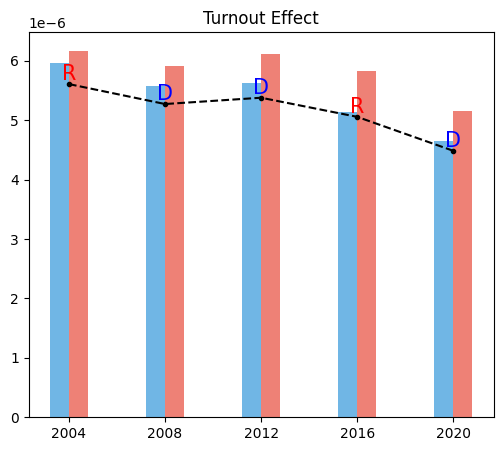

In [43]:
blue_avg_turnout = e_blue_st.iloc[:, 6:].mean()
red_avg_turnout = e_red_st.iloc[:, 6:].mean()

total_avg_turnout = encoded_Vote04_20.iloc[:, 11:-1].mean()
print(len(total_avg_turnout))

effect_turnout = pd.DataFrame({
                    'Year': [2004, 2008, 2012, 2016, 2020],
                    'Winner': winner,
                    'Avg_Turnout(D)': blue_avg_turnout.values,
                    'Avg_Turnout(R)': red_avg_turnout.values,
                    'Avg_Turnout(Total)': total_avg_turnout.values,
})

# 대체 왜!! 투표결과와 투표율 간 상관관계가 안보이지..

display(effect_turnout)

plt.figure(figsize=(6,5))
plt.bar(effect_turnout['Year']-0.4, effect_turnout['Avg_Turnout(D)'], color='#3498db', alpha=0.7)
plt.bar(effect_turnout['Year']+0.4, effect_turnout['Avg_Turnout(R)'], color='#e74c3c', alpha=0.7)
plt.plot(effect_turnout['Year'], effect_turnout['Avg_Turnout(Total)'], 'k--', marker='.')
for i, win in enumerate(effect_turnout['Winner']):
    color = 'blue' if win == 'D' else 'red'
    plt.text(effect_turnout['Year'][i], effect_turnout['Avg_Turnout(Total)'][i], win, fontsize=15,
             color=color, ha='center', va='bottom')
plt.xticks(effect_turnout['Year']) # x값 연도로 고정
plt.title('Turnout Effect')
plt.savefig("Turnout Effect.png")
plt.show()

In [44]:
swing_20 = Vote04_20.sort_values(ascending=True, by='Gap20', key=abs)['STATE'].head(7).values
swing_16 = Vote04_20.sort_values(ascending=True, by='Gap16', key=abs)['STATE'].head(7).values
swing_12 = Vote04_20.sort_values(ascending=True, by='Gap12', key=abs)['STATE'].head(7).values
swing_08 = Vote04_20.sort_values(ascending=True, by='Gap08', key=abs)['STATE'].head(7).values
swing_04 = Vote04_20.sort_values(ascending=True, by='Gap04', key=abs)['STATE'].head(7).values

In [51]:
def predict_winners(Vote04_20, swing_states):
    candidates = {
        '20': ['Joseph R. Biden', 'Donald J. Trump'],
        '16': ['Hillary Clinton', 'Donald J. Trump'],
        '12': ['Barack Obama', 'Mitt Romney'],
        '08': ['Barack Obama', 'John McCain'],
        '04': ['John F. Kerry', 'George W. Bush']
    }
    
    for year in ['04', '08', '12', '16', '20']:
        states = swing_states if isinstance(swing_states, list) else swing_states.get(year, [])
        predict = Vote04_20[Vote04_20['STATE'].isin(states)]
        max_winner = predict[f'Won{year}'].value_counts().index[0]
        winner = candidates[year][max_winner != 'D']
        print(f'20{year}/ {winner}({max_winner})')

print("==== 각 해마다의 경합주에 따른 선거결과 예측 ====")
swing_states = {
    '04': swing_04,
    '08': swing_08,
    '12': swing_12,
    '16': swing_16,
    '20': swing_20
}
predict_winners(Vote04_20, swing_states)
print('=> 예측정확도:', 5/5*100)

print("\n==== 분석을 통해 추출한 7개의 경합주로 선거결과 예측 ====")
swing_states_fixed = ['WI', 'FL', 'PA', 'NC', 'NV', 'MI', 'AZ']
predict_winners(Vote04_20, swing_states_fixed)
print('=> 예측정확도:', 5/5*100)

==== 각 해마다의 경합주에 따른 선거결과 예측 ====
2004/ George W. Bush(R)
2008/ Barack Obama(D)
2012/ Barack Obama(D)
2016/ Donald J. Trump(R)
2020/ Joseph R. Biden(D)
=> 예측정확도: 100.0

==== 분석을 통해 추출한 7개의 경합주로 선거결과 예측 ====
2004/ George W. Bush(R)
2008/ Barack Obama(D)
2012/ Barack Obama(D)
2016/ Donald J. Trump(R)
2020/ Joseph R. Biden(D)
=> 예측정확도: 100.0


In [52]:
print(swing_04)
print(swing_08)
print(swing_12)
print(swing_16)
print(swing_20)

['WI' 'IA' 'NM' 'NH' 'OH' 'PA' 'NV']
['MO' 'NC' 'IN' 'MT' 'FL' 'OH' 'GA']
['FL' 'NC' 'OH' 'VA' 'CO' 'PA' 'NH']
['MI' 'NH' 'PA' 'WI' 'FL' 'MN' 'NV']
['GA' 'AZ' 'WI' 'PA' 'NC' 'NV' 'MI']


In [53]:
print(*swing_states_fixed)

WI FL PA NC NV MI AZ


ELECTORAL VOTE BASED:
AZ CO FL GA IN IA ME MI NE NV NM NC OH PA VA WI 

POPULAR VOTE(Small Gap) BASED:
2020: GA AZ WI PA NC NV MI
2016: MI NH PA WI FL MN NV
2012: FL NC OH VA CO PA NH
2008: MO NC IN MT FL OH GA
2004: WI IA NM NH OH PA NV
   =  



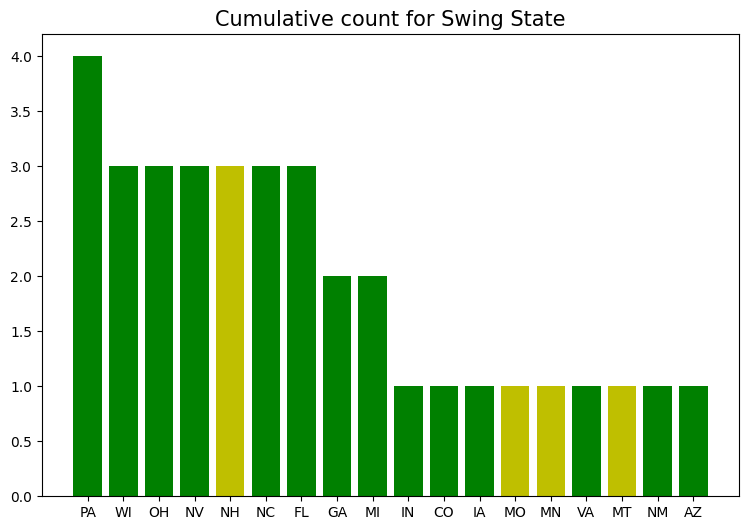

In [54]:
# BASED ON ELEC
print("ELECTORAL VOTE BASED:")
possible_swing = list()
for i in range(len(Vote04_20)-1):
    if Vote04_20.iloc[i, -1] == 'Swing':
        possible_swing.append(Vote04_20['STATE'][i])
print(*possible_swing, '\n')

# BASED ON POPULAR VOTE
print("POPULAR VOTE(Small Gap) BASED:")
print('2020:', *swing_20)
print('2016:', *swing_16)
print('2012:', *swing_12)
print('2008:', *swing_08)
print('2004:', *swing_04)
# print(' AVG:', swing_avg)

all_swing = swing_20.tolist() + swing_16.tolist() + swing_12.tolist() + swing_08.tolist() + swing_04.tolist()
states, counts = np.unique(all_swing, return_counts=True)

sorted_idx = np.argsort(counts)[::-1]
states = states[sorted_idx]
counts = counts[sorted_idx]


color = []
for st in states:
    if st in possible_swing:
        color.append('g')
    else:
        color.append('y')

plt.figure(figsize=(9, 6))
plt.bar(states, counts, color=color)
plt.title("Cumulative count for Swing State", fontsize=15)
plt.savefig("Cumulative count for Swing State")

swing04_20 = list(reduce(set.intersection, [set(lst) for lst in [swing_04, swing_08, swing_12, swing_16, swing_20]]))
print('   = ', *swing04_20, '\n')

state_name = PresGeneralResults20['STATE'].unique()
state = PresGeneralResults20['STATE ABBREVIATION'].unique()

state_name = state_name[1:-1]
state = state[1:-1]

# WI: Wisconsin, NV: Nevada, NH: New Hampshire, ME: Maine, AK: Alaska, PA: Pennsylvania, DE: Delaware

In [55]:
swing_state_10 = ['WI', 'FL', 'PA', 'NC', 'NV', 'MI', 'AZ']
swing_state_9 = ['WI', 'FL', 'PA', 'NC', 'NV', 'MI', 'OH']
swing_state_8 = ['WI', 'FL', 'PA', 'NC', 'NV', 'MI', 'OH']
swing_state_7 = ['WI', 'FL', 'PA', 'NC', 'NV', 'GA', 'OH']

full_state = [fullname('WI'), fullname('FL'), fullname('PA'), fullname('NC'), fullname('NV'), fullname('MI'), fullname('AZ')]
print('==== Possible Swing states(7) ====')
for i in range(len(full_state)):
    print(full_state[i])

==== Possible Swing states(7) ====
Wisconsin
Florida
Pennsylvania
North Carolina
Nevada
Michigan
Arizona


In [56]:
swing_state = ['NV', 'WI', 'ME', 'NM', 'IA', 'NC', 'PA']
for_swing = Vote04_20[Vote04_20['STATE'].isin(swing_state)]
for_swing

,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond
15,IA,R,D,D,R,R,-0.006675,0.095348,0.058101,-0.094068,-0.081976,0.000005,0.000005,0.000004,0.000004,0.000004,Swing
19,ME,D,D,D,R,D,0.089964,0.173217,0.152879,0.029604,0.090712,0.000005,0.000005,0.000006,0.000005,0.000005,Swing
28,NV,R,D,D,D,D,-0.025917,0.124926,0.066809,0.024171,0.023905,0.000006,0.000005,0.000006,0.000005,0.000004,Swing
31,NM,R,D,D,D,D,-0.007917,0.151284,0.101494,0.082131,0.107926,0.000007,0.000006,0.000006,0.000006,0.000005,Swing
33,NC,R,D,R,R,R,-0.124341,0.003289,-0.020421,-0.036552,-0.013482,0.000004,0.000003,0.000003,0.000003,0.000003,Swing
38,PA,D,D,D,R,D,0.025001,0.103185,0.053851,-0.007184,0.011612,0.000004,0.000003,0.000003,0.000003,0.000003,Swing
49,WI,D,D,D,R,D,0.003798,0.139041,0.069423,-0.007643,0.006271,0.000003,0.000003,0.000003,0.000003,0.000003,Swing


In [57]:
encoded_Vote04_20

,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond
0,AL,1,1,1,1,1,0.256158,0.215765,0.221868,0.277251,0.254617,0.000005,0.000004,0.000004,0.000004,0.000004,1
1,AK,1,1,1,1,1,0.255485,0.215351,0.139889,0.147306,0.100612,0.000010,0.000009,0.000010,0.000009,0.000008,1
2,AZ,1,1,1,1,0,0.104726,0.085200,0.090648,0.035456,0.003087,0.000005,0.000004,0.000005,0.000004,0.000003,2
3,AR,1,1,1,1,1,0.097583,0.198512,0.236879,0.269200,0.276207,0.000006,0.000006,0.000006,0.000005,0.000005,1
4,CA,0,0,0,0,0,0.099475,0.240578,0.231186,0.301093,0.291641,0.000004,0.000004,0.000004,0.000004,0.000003,0
5,CO,1,0,0,0,0,0.046717,0.089530,0.053652,0.049055,0.135016,0.000004,0.000004,0.000004,0.000003,0.000003,2
6,CT,0,0,0,0,0,0.103664,0.223673,0.173315,0.136394,0.200736,0.000004,0.000004,0.000004,0.000004,0.000004,0
7,DE,0,0,0,0,0,0.075940,0.249956,0.186267,0.113732,0.189681,0.000008,0.000007,0.000007,0.000007,0.000006,0
8,DC,0,0,0,0,0,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000011,0.000010,0.000010,0.000009,0
9,FL,1,0,0,1,1,0.050064,0.028180,0.008769,0.011986,0.033584,0.000004,0.000003,0.000003,0.000003,0.000003,2


In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [59]:
# encoded_Vote04_20.drop(columns=['Cluster'], inplace=True)

for_k = encoded_Vote04_20.columns[1:]

kmeans = KMeans(n_clusters=3, random_state=42).fit(encoded_Vote04_20[encoded_Vote04_20.columns[1:]])
encoded_Vote04_20['Cluster'] = kmeans.labels_

encoded_Vote04_20

,STATE,Won04,Won08,Won12,Won16,Won20,Gap04,Gap08,Gap12,Gap16,Gap20,Turnout04,Turnout08,Turnout12,Turnout16,Turnout20,Correspond,Cluster
0,AL,1,1,1,1,1,0.256158,0.215765,0.221868,0.277251,0.254617,0.000005,0.000004,0.000004,0.000004,0.000004,1,1
1,AK,1,1,1,1,1,0.255485,0.215351,0.139889,0.147306,0.100612,0.000010,0.000009,0.000010,0.000009,0.000008,1,1
2,AZ,1,1,1,1,0,0.104726,0.085200,0.090648,0.035456,0.003087,0.000005,0.000004,0.000005,0.000004,0.000003,2,1
3,AR,1,1,1,1,1,0.097583,0.198512,0.236879,0.269200,0.276207,0.000006,0.000006,0.000006,0.000005,0.000005,1,1
4,CA,0,0,0,0,0,0.099475,0.240578,0.231186,0.301093,0.291641,0.000004,0.000004,0.000004,0.000004,0.000003,0,2
5,CO,1,0,0,0,0,0.046717,0.089530,0.053652,0.049055,0.135016,0.000004,0.000004,0.000004,0.000003,0.000003,2,0
6,CT,0,0,0,0,0,0.103664,0.223673,0.173315,0.136394,0.200736,0.000004,0.000004,0.000004,0.000004,0.000004,0,2
7,DE,0,0,0,0,0,0.075940,0.249956,0.186267,0.113732,0.189681,0.000008,0.000007,0.000007,0.000007,0.000006,0,2
8,DC,0,0,0,0,0,0.798441,0.859246,0.836348,0.867763,0.867524,0.000013,0.000011,0.000010,0.000010,0.000009,0,2
9,FL,1,0,0,1,1,0.050064,0.028180,0.008769,0.011986,0.033584,0.000004,0.000003,0.000003,0.000003,0.000003,2,0


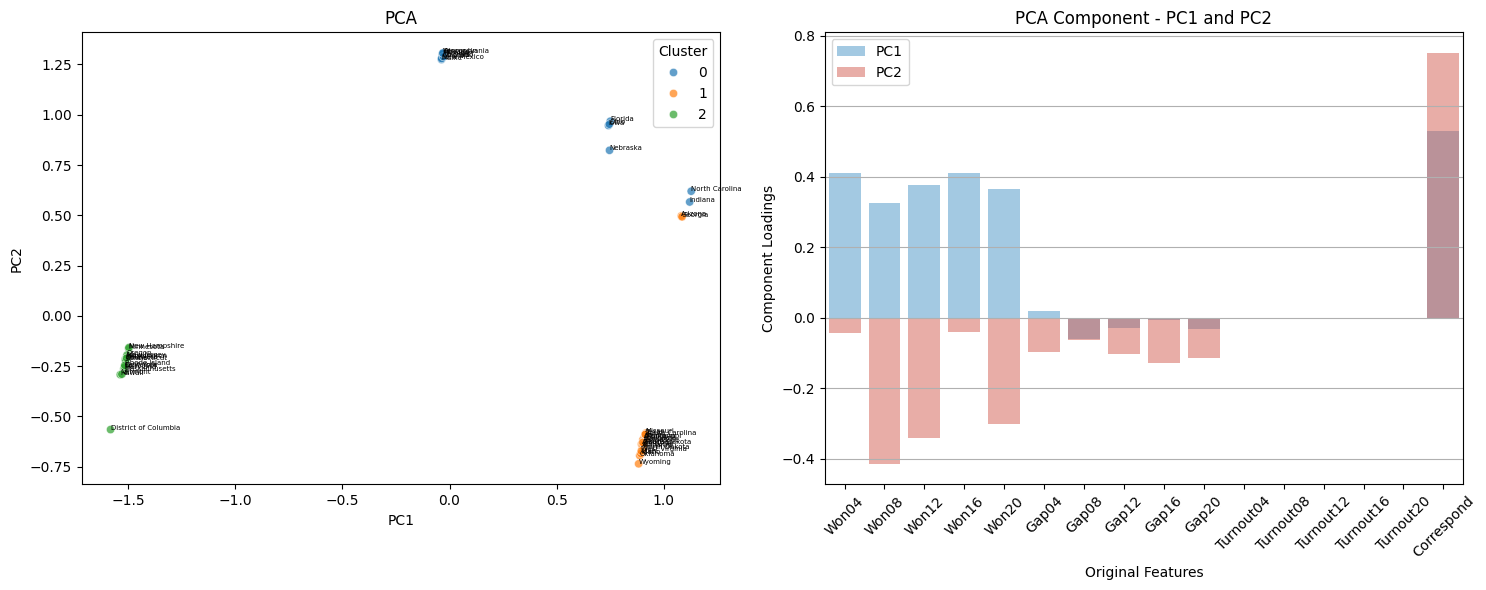

In [60]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_Vote04_20[for_k])
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

df_pca = pd.concat([pca_df, encoded_Vote04_20[['STATE', 'Cluster']]], axis=1)

# For fullname
for i in range(len(df_pca)):
    st = df_pca.iloc[i,2]
    df_pca.iloc[i,2] = fullname(st)

palette = sns.color_palette("tab10", n_colors=df_pca['Cluster'].nunique())
pal_idx = palette.as_hex()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette=palette, alpha=0.7, legend='full', ax=ax[0])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
for i, txt in enumerate(df_pca['STATE']):
    ax[0].annotate(txt, (df_pca['PC1'].iloc[i], df_pca['PC2'].iloc[i]), fontsize=5)
ax[0].set_title('PCA')

pca_components = pca.components_
loading_df = pd.DataFrame(data=pca_components.T, columns=['PC1', 'PC2'])
loading_df['Feature'] = encoded_Vote04_20.columns[1:-1]

sns.barplot(x='Feature', y='PC1', data=loading_df, ax=ax[1], alpha=0.5, label='PC1')
sns.barplot(x='Feature', y='PC2', data=loading_df, ax=ax[1], alpha=0.5, label='PC2')

ax[1].set_xlabel('Original Features')
ax[1].set_ylabel('Component Loadings')
ax[1].set_title('PCA Component - PC1 and PC2')
ax[1].legend()
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y')

plt.tight_layout()
plt.savefig("Kmeans-PCA.png")
plt.show()

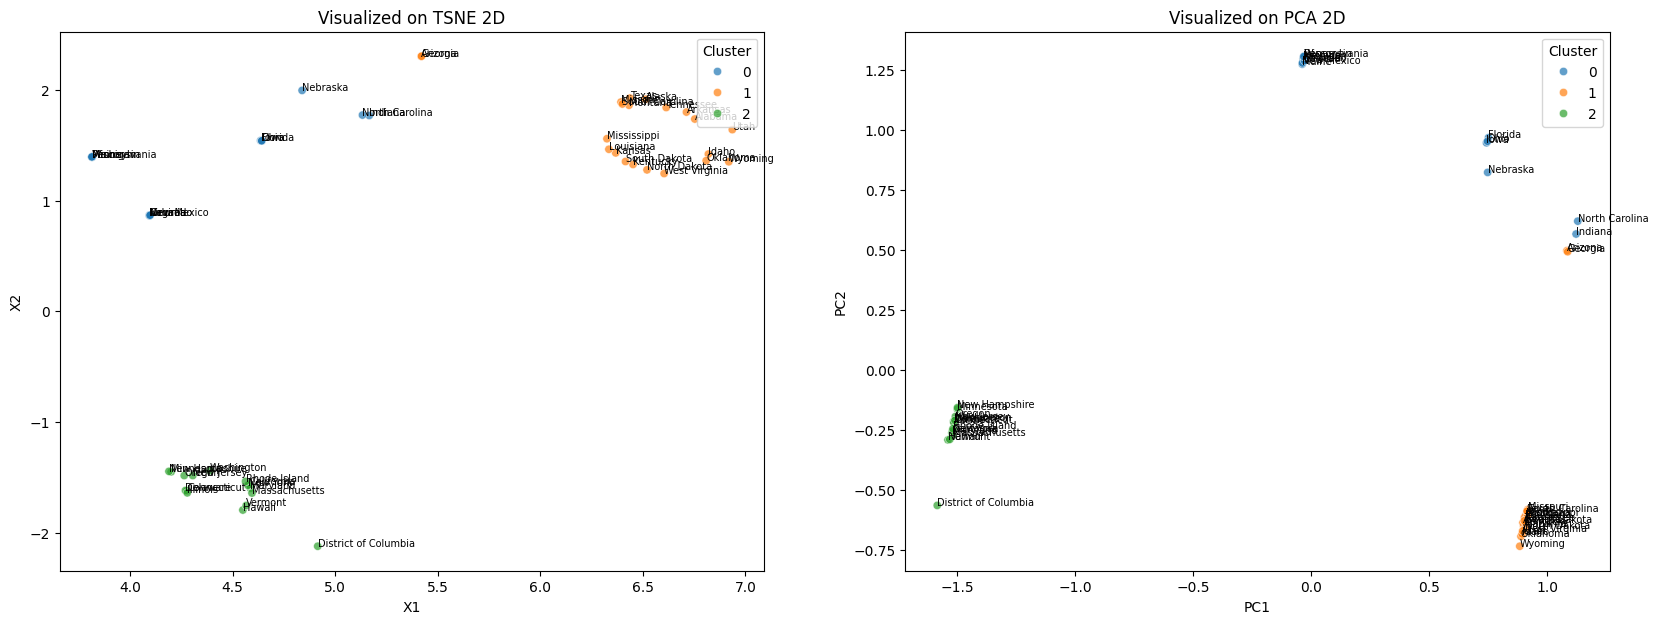

In [61]:
X = encoded_Vote04_20.iloc[:, 1:-1]
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)
tsne_df = pd.DataFrame(tsne_result, columns=['X1', 'X2'])
df_tsne = pd.concat([tsne_df, encoded_Vote04_20[['STATE', 'Cluster']]], axis=1)

# For fullname
for i in range(len(df_tsne)):
    st = df_tsne.iloc[i,2]
    df_tsne.iloc[i,2] = fullname(st)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.scatterplot(data=df_tsne, x='X1', y='X2', hue='Cluster', palette=palette, alpha=0.7, legend='full', ax=ax[0])
for i, txt in enumerate(df_tsne['STATE']):
    ax[0].annotate(txt, (df_tsne['X1'].iloc[i], df_tsne['X2'].iloc[i]), fontsize=7)
ax[0].set_title('Visualized on TSNE 2D')

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette=palette, alpha=0.7, legend='full', ax=ax[1])
for i, txt in enumerate(df_pca['STATE']):
    ax[1].annotate(txt, (df_pca['PC1'].iloc[i], df_pca['PC2'].iloc[i]), fontsize=7)
ax[1].set_title('Visualized on PCA 2D')

plt.savefig("Kmeans-TSNE.png")
plt.show()

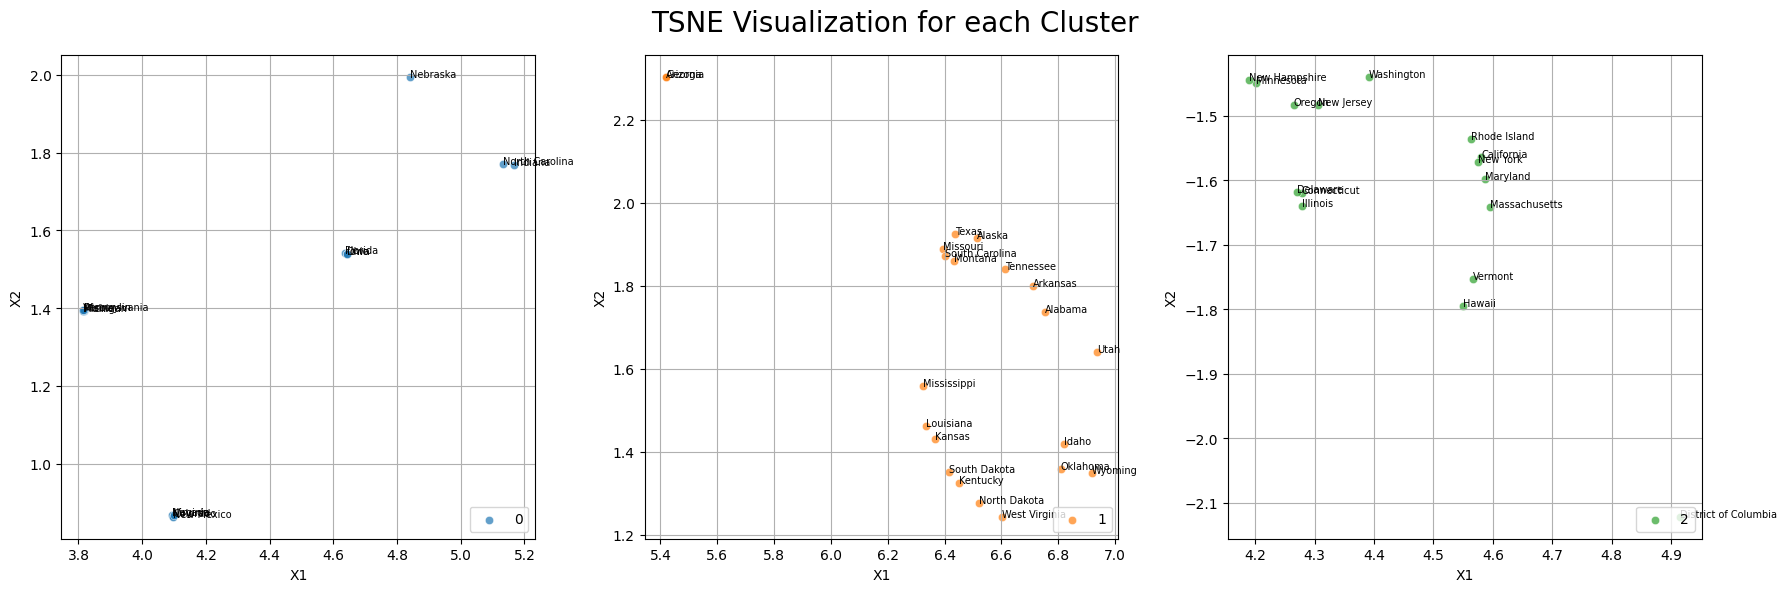

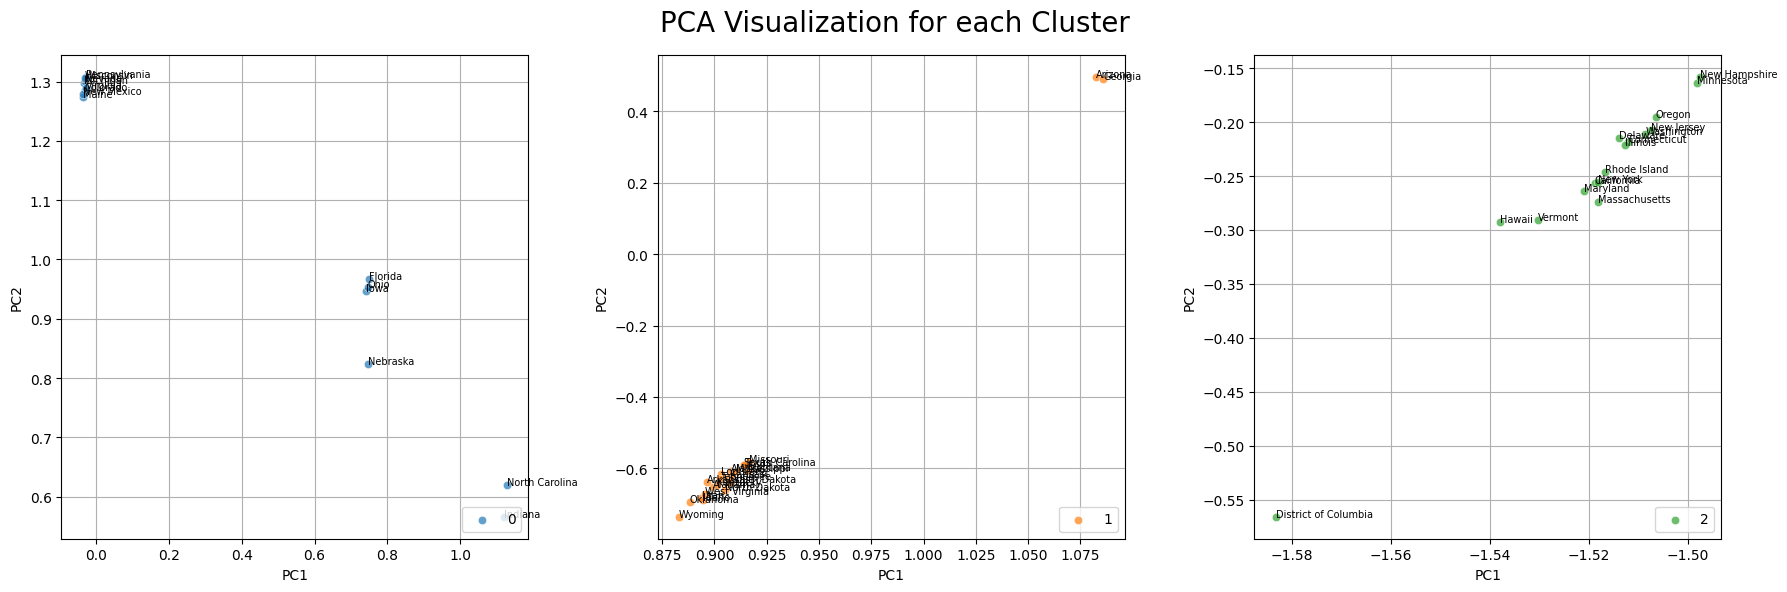

In [62]:
clust_0 = df_tsne[df_tsne['Cluster']==0]
clust_1 = df_tsne[df_tsne['Cluster']==1]
clust_2 = df_tsne[df_tsne['Cluster']==2]


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
sns.scatterplot(data=clust_0, x='X1', y='X2', color=pal_idx[0], alpha=0.7, label='0', ax=ax[0])
for i, txt in enumerate(clust_0['STATE']):
    ax[0].annotate(txt, (clust_0['X1'].iloc[i], clust_0['X2'].iloc[i]), fontsize=7)
ax[0].legend(loc='lower right')
ax[0].grid()

sns.scatterplot(data=clust_1, x='X1', y='X2', color=pal_idx[1], alpha=0.7, label='1', ax=ax[1])
for i, txt in enumerate(clust_1['STATE']):
    ax[1].annotate(txt, (clust_1['X1'].iloc[i], clust_1['X2'].iloc[i]), fontsize=7)
ax[1].legend(loc='lower right')
ax[1].grid()

sns.scatterplot(data=clust_2, x='X1', y='X2', color=pal_idx[2], alpha=0.7, label='2', ax=ax[2])
for i, txt in enumerate(clust_2['STATE']):
    ax[2].annotate(txt, (clust_2['X1'].iloc[i], clust_2['X2'].iloc[i]), fontsize=7)
ax[2].legend(loc='lower right')
ax[2].grid()

plt.suptitle('TSNE Visualization for each Cluster',fontsize=20)
plt.tight_layout()
plt.savefig("TSNE per Cluster.png")
plt.show()

# ----------- PCA -----------
clust_0 = df_pca[df_pca['Cluster']==0]
clust_1 = df_pca[df_pca['Cluster']==1]
clust_2 = df_pca[df_pca['Cluster']==2]


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
sns.scatterplot(data=clust_0, x='PC1', y='PC2', color=pal_idx[0], alpha=0.7, label='0', ax=ax[0])
for i, txt in enumerate(clust_0['STATE']):
    ax[0].annotate(txt, (clust_0['PC1'].iloc[i], clust_0['PC2'].iloc[i]), fontsize=7)
ax[0].legend(loc='lower right')
ax[0].grid()

sns.scatterplot(data=clust_1, x='PC1', y='PC2', color=pal_idx[1], alpha=0.7, label='1', ax=ax[1])
for i, txt in enumerate(clust_1['STATE']):
    ax[1].annotate(txt, (clust_1['PC1'].iloc[i], clust_1['PC2'].iloc[i]), fontsize=7)
ax[1].legend(loc='lower right')
ax[1].grid()

sns.scatterplot(data=clust_2, x='PC1', y='PC2', color=pal_idx[2], alpha=0.7, label='2', ax=ax[2])
for i, txt in enumerate(clust_2['STATE']):
    ax[2].annotate(txt, (clust_2['PC1'].iloc[i], clust_2['PC2'].iloc[i]), fontsize=7)
ax[2].legend(loc='lower right')
ax[2].grid()

plt.suptitle('PCA Visualization for each Cluster',fontsize=20)
plt.tight_layout()
plt.savefig("PCA per Cluster.png")
plt.show()